<a href="https://colab.research.google.com/github/Brijwali/Predicting-employee-attrition-/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
# Libray for Data Manipulation.
import numpy as np
import pandas as pd

#Library for Data Visualization
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency


# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [ ]:
data = pd.read_csv('/content/Reva_employee_dataset.csv')
data

Age  Gender Attrition       Department  Environment Satisfaction  \
0     38  Female       Yes             B.E.                         4   
1     38    Male        No              CSA                         4   
2     27    Male       Yes  Applied science                         3   
3     49    Male       Yes             B.E.                         4   
4     34    Male        No              CSA                         4   
5     40  Female        No              CSA                         3   
6     38  Female       Yes             B.E.                         2   
7     29  Female        No  Applied science                         2   
8     22  Female        No             B.E.                         4   
9     36  Female        No              CSA                         2   
10    40  Female        No  Applied science                         4   
11    46  Female       Yes              CSA                         4   
12    32  Female        No             B.E.                         4   
13    30  Female        No  Applied science                         3   
14    27  Female       Yes             B.E.                         4   
15    51    Male        No              CSA                         2   
16    30  Female       Yes             B.E.                         4   
17    41    Male       Yes  Applied science                         4   
18    30    Male        No              CSA                         3   
19    29  Female       Yes             B.E.                         3   
20    45    Male        No              CSA                         4   
21    54    Male        No  Applied science                         4   
22    36    Male        No              CSA                         4   
23    33  Female        No              CSA                         3   
24    37  Female        No             B.E.                         2   
25    38    Male        No             B.E.                         1   
26    31    Male       Yes              CSA                         3   
27    59    Male        No  Applied science                         3   
28    37  Female        No             B.E.                         1   
29    29  Female        No              CSA                         2   
30    35  Female        No             B.E.                         3   
31    29  Female       Yes  Applied science                         3   
32    52  Female        No             B.E.                         3   
33    42    Male        No              CSA                         3   
34    59  Female       Yes             B.E.                         2   
35    50    Male        No  Applied science                         4   
36    33    Male       Yes             B.E.                         3   
37    43  Female        No              CSA                         4   
38    33    Male       Yes             B.E.                         1   
39    52    Male        No              CSA                         1   
40    32    Male        No  Applied science                         3   
41    32    Male        No              CSA                         4   
42    39    Male        No  Applied science                         3   
43    32    Male        No              CSA                         3   
44    41    Male        No             B.E.                         3   
45    40    Male        No  Applied science                         1   
46    45  Female        No              CSA                         3   
47    31  Female        No  Applied science                         2   
48    33    Male       Yes              CSA                         3   
49    34  Female        No             B.E.                         4   
50    37  Female       Yes              CSA                         3   
51    45    Male       Yes             B.E.                         1   
52    37    Male       Yes  Applied science                         1   
53    39    Male       Yes              CSA                    

In [ ]:
data.head()

Age  Gender Attrition       Department  Environment Satisfaction  \
0   38  Female       Yes             B.E.                         4   
1   38    Male        No              CSA                         4   
2   27    Male       Yes  Applied science                         3   
3   49    Male       Yes             B.E.                         4   
4   34    Male        No              CSA                         4   

  Marital status  MonthlyIncome  YearsInCurrentRole  HourlyRate  \
0         Single           4449                  11          72   
1         Single           2218                   2          98   
2         Single          19197                   8          52   
3        Married          13212                   7          86   
4         Single           6577                   4          83   

   Job responsibilities  JobSatisfaction leftOrganizationInPast12mnths  \
0                     5                3                            No   
1                     4                1                            No   
2                     4                3                           Yes   
3                     4                1                           Yes   
4                     4                3                           Yes   

                                 Reasons for leaving  NumInstitutesWorked  \
0  Better job opportunities, Work-related stress,...                    0   
1                             Issues with management                    6   
2                           Better job opportunities                    0   
3                          Compensation and benefits                    0   
4                           Better job opportunities                    1   

   PercentSalaryHike  RelationshipSatisfaction  DistanceFromHome  \
0                 23                         2                 5   
1                 15                         1                15   
2                 11                         3                25   
3                 12                         1                 5   
4                 13                         4                16   

  BusinessTravel  Education           EducationField  WorkLifeBalance  \
0  Travel_Rarely          3  Business Administration                3   
1     Non-Travel          3           Communications                3   
2  Travel_Rarely          2         Computer Science                2   
3  Travel_Rarely          1   Information Technology                3   
4  Travel_Rarely          2                Marketing                3   

   YearsAtOrganization  JobInvolvement  PerformanceRating  JobLevel  
0                   10               3                  3         4  
1                    0               3                  3         2  
2                    8               3                  4         1  
3                    2               3                  3         1  
4                    7               3                  3         1

In [ ]:
data.shape

(1000, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Attrition                      1000 non-null   object
 3   Department                     1000 non-null   object
 4   Environment Satisfaction       1000 non-null   int64 
 5   Marital status                 1000 non-null   object
 6   MonthlyIncome                  1000 non-null   int64 
 7   YearsInCurrentRole             1000 non-null   int64 
 8   HourlyRate                     1000 non-null   int64 
 9   Job responsibilities           1000 non-null   int64 
 10  JobSatisfaction                1000 non-null   int64 
 11  leftOrganizationInPast12mnths  1000 non-null   object
 12  Reasons for leaving            1000 non-null   object
 13  NumI

In [ ]:
# Identify the data types of columns
column_data_types = data.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 17 Numerical Columns in dataset
There are 8 Categorical Columns in dataset


In [ ]:
data.select_dtypes(np.number).sample(5)

Age  Environment Satisfaction  MonthlyIncome  YearsInCurrentRole  \
281   24                         1           6932                   8   
488   46                         4           1959                   0   
924   60                         4          13097                   3   
286   31                         1           9705                   0   
704   35                         1           6072                   3   

     HourlyRate  Job responsibilities  JobSatisfaction  NumInstitutesWorked  \
281          45                     3                3                    1   
488         100                     5                1                    1   
924         100                     5                3                    2   
286          67                     5                2                    1   
704          98                     5                2                    6   

     PercentSalaryHike  RelationshipSatisfaction  DistanceFromHome  Education  \
281                 18                         4                 9          4   
488                 24                         3                14          1   
924                 17                         4                 1          3   
286                 14                         4                 2          3   
704                 11                         2                15          1   

     WorkLifeBalance  YearsAtOrganization  JobInvolvement  PerformanceRating  \
281                3                   10               3                  3   
488                3                    2               2                  3   
924                2                   10               3                  3   
286                3                    2               2                  3   
704                2                    3               3                  3   

     JobLevel  
281         4  
488         1  
924         1  
286         3  
704         2

**CONVERTING TEXT TO NUMBERS**

In [ ]:
data["Environment Satisfaction"] = data["Environment Satisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})

In [ ]:
data.select_dtypes(include='O').sample(5)

Gender Attrition       Department Environment Satisfaction Marital status  \
506   Male        No              CSA                Very High        Married   
217   Male        No              CSA                Very High         Single   
941   Male       Yes             B.E.                   Medium         Single   
646   Male       Yes  Applied science                     High         Single   
997   Male        No              CSA                     High        Married   

    JobSatisfaction leftOrganizationInPast12mnths  \
506          Medium                           Yes   
217       Very High                           Yes   
941            High                            No   
646             Low                           Yes   
997             Low                            No   

                                   Reasons for leaving  \
506                           Better job opportunities   
217     Work-related stress, Compensation and benefits   
941                                Work-related stress   
646  Lack of career growth, Work-related stress, Co...   
997    Better job opportunities, Lack of carrer growth   

    RelationshipSatisfaction BusinessTravel Education  \
506                   Medium  Travel_Rarely    Master   
217                Very High  Travel_Rarely    Master   
941                Very High     Non-Travel  Bachelor   
646                      Low  Travel_Rarely  Bachelor   
997                      Low  Travel_Rarely  Bachelor   

              EducationField WorkLifeBalance JobInvolvement PerformanceRating  \
506   Information Technology            Good      Very High         Excellent   
217  Business Administration          Better      Very High         Excellent   
941         Computer Science            Best         Medium         Excellent   
646           Communications          Better           High         Excellent   
997           Communications          Better            Low         Excellent   

         JobLevel  
506  Junior Level  
217   Entry Level  
941   Entry Level  
646  Junior Level  
997  Junior Level

In [ ]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


In [ ]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

Total No. of Missing Values  \
Age                                                      0   
Gender                                                   0   
Attrition                                                0   
Department                                               0   
Environment Satisfaction                                 0   
Marital status                                           0   
MonthlyIncome                                            0   
YearsInCurrentRole                                       0   
HourlyRate                                               0   
Job responsibilities                                     0   
JobSatisfaction                                          0   
leftOrganizationInPast12mnths                            0   
Reasons for leaving                                      0   
NumInstitutesWorked                                      0   
PercentSalaryHike                                        0   
RelationshipSatisfaction                                 0   
DistanceFromHome                                         0   
BusinessTravel                                           0   
Education                                                0   
EducationField                                           0   
WorkLifeBalance                                          0   
YearsAtOrganization                                      0   
JobInvolvement                                           0   
PerformanceRating                                        0   
JobLevel                                                 0   

                               % of Missing Values  
Age                                            0.0  
Gender                                         0.0  
Attrition                                      0.0  
Department                                     0.0  
Environment Satisfaction                       0.0  
Marital status                                 0.0  
MonthlyIncome                                  0.0  
YearsInCurrentRole                             0.0  
HourlyRate                                     0.0  
Job responsibilities                           0.0  
JobSatisfaction                                0.0  
leftOrganizationInPast12mnths                  0.0  
Reasons for leaving                            0.0  
NumInstitutesWorked                            0.0  
PercentSalaryHike                              0.0  
RelationshipSatisfaction                       0.0  
DistanceFromHome                               0.0  
BusinessTravel                                 0.0  
Education                                      0.0  
EducationField                                 0.0  
WorkLifeBalance                                0.0  
YearsAtOrganization                            0.0  
JobInvolvement                                 0.0  
PerformanceRating                              0.0  
JobLevel                                       0.0

In [ ]:
round(data.describe().T,2)     #rounding to 2 decimal place

count     mean      std     min     25%     50%  \
Age                   1000.0    37.58    12.28    18.0    28.0    37.0   
MonthlyIncome         1000.0  6925.17  5516.45  1009.0  2685.5  5214.0   
YearsInCurrentRole    1000.0     3.74     3.41     0.0     1.0     3.0   
HourlyRate            1000.0    67.98    23.04    30.0    49.0    67.0   
Job responsibilities  1000.0     3.86     0.96     1.0     3.0     4.0   
NumInstitutesWorked   1000.0     1.74     2.30     0.0     0.0     1.0   
PercentSalaryHike     1000.0    15.63     4.18    11.0    12.0    15.0   
DistanceFromHome      1000.0    11.49    12.02     0.0     3.0     8.0   
YearsAtOrganization   1000.0     8.44     8.40     0.0     3.0     7.0   

                         75%      max  
Age                     47.0     60.0  
MonthlyIncome         9548.5  19973.0  
YearsInCurrentRole       6.0     16.0  
HourlyRate              90.0    100.0  
Job responsibilities     5.0      5.0  
NumInstitutesWorked      3.0      9.0  
PercentSalaryHike       18.0     25.0  
DistanceFromHome        16.0     60.0  
YearsAtOrganization     10.0     40.0

In [ ]:
cols = ["leftOrganizationInPast12mnths", "Reasons for leaving"]
data.drop(columns=cols, inplace=True)

In [ ]:
data.describe(include="O").T

count unique                     top freq
Gender                    1000      2                    Male  731
Attrition                 1000      2                      No  763
Department                1000      3                     CSA  387
Environment Satisfaction  1000      4               Very High  317
Marital status            1000      3                  Single  569
JobSatisfaction           1000      4                    High  261
RelationshipSatisfaction  1000      4                    High  309
BusinessTravel            1000      3           Travel_Rarely  780
Education                 1000      5                Bachelor  418
EducationField            1000      5  Information Technology  241
WorkLifeBalance           1000      4                  Better  651
JobInvolvement            1000      4                    High  574
PerformanceRating         1000      2               Excellent  848
JobLevel                  1000      5             Entry Level  369

In [ ]:
cat_cols = data.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(data[column]))
    print("-"*121)

Unique values of  Gender {'Male', 'Female'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Attrition {'Yes', 'No'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'B.E.', 'Applied science', 'CSA'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Environment Satisfaction {'Medium', 'Very High', 'High', 'Low'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Marital status {'Divorced', 'Married', 'Single'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  JobSatisfaction {'Medium', 'Low', 'High', 'Very High'}
------------------

**VISUALIZING THE DATA**

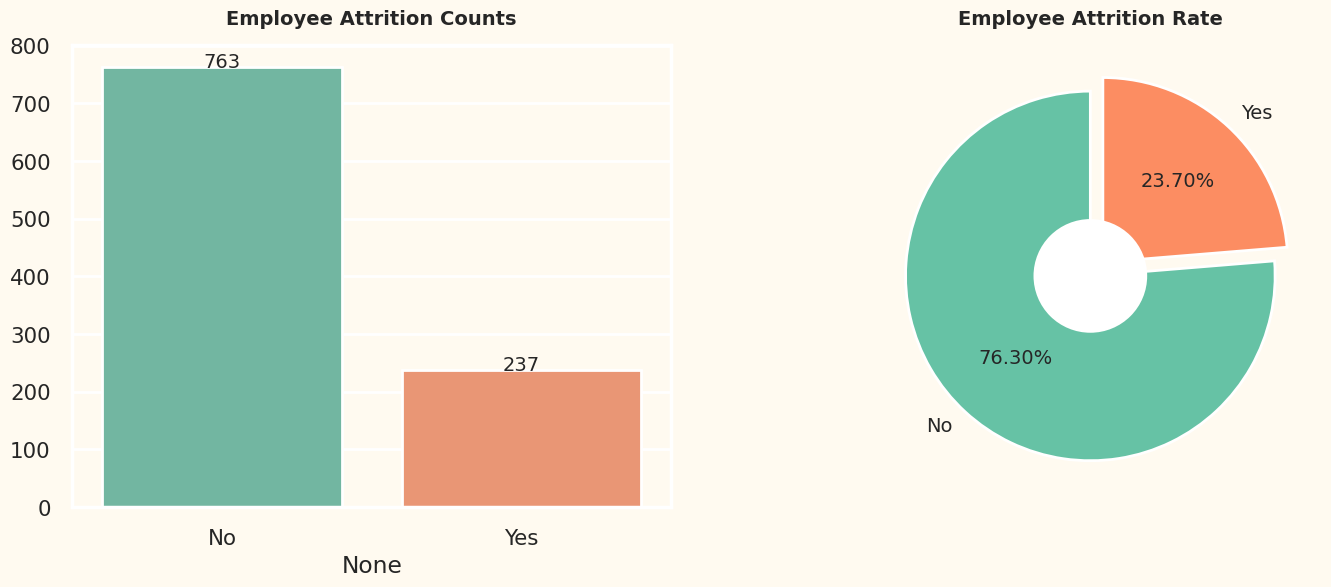

In [ ]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

In [ ]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

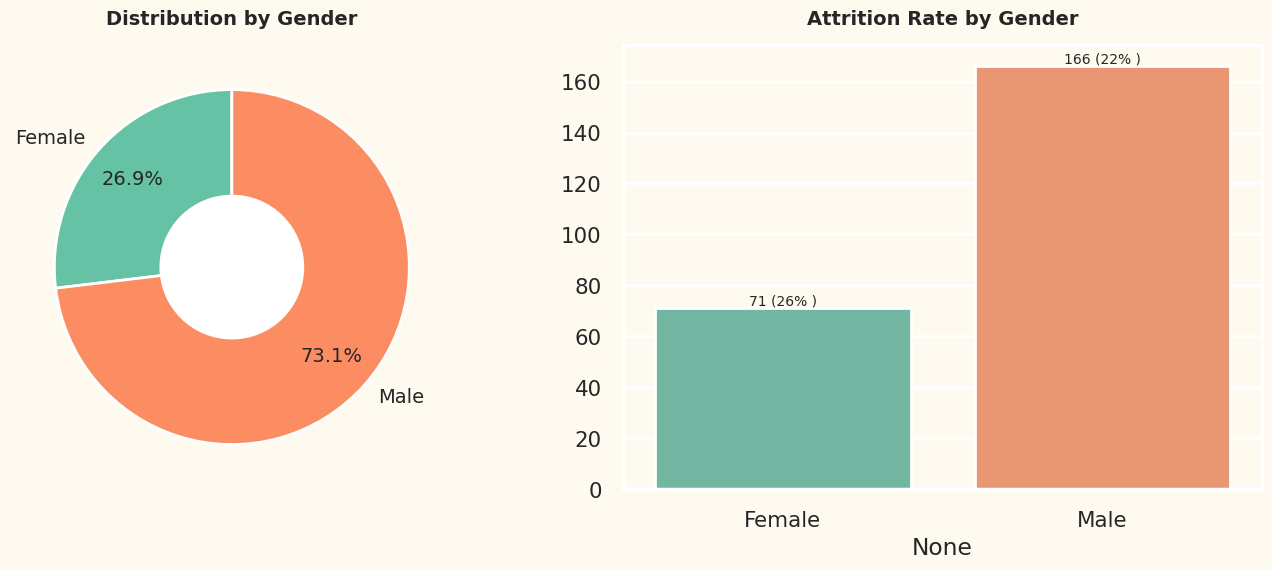

In [ ]:
pie_bar_plot(data, 'Gender', 'Attrition')

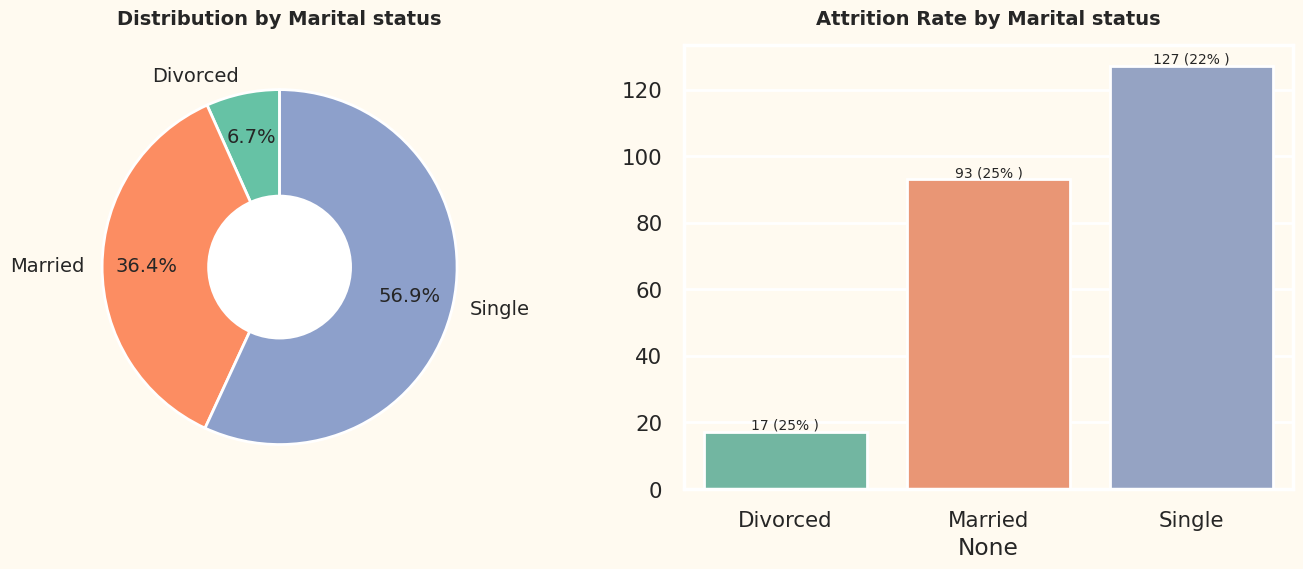

In [ ]:
pie_bar_plot(data, 'Marital status', 'Attrition')

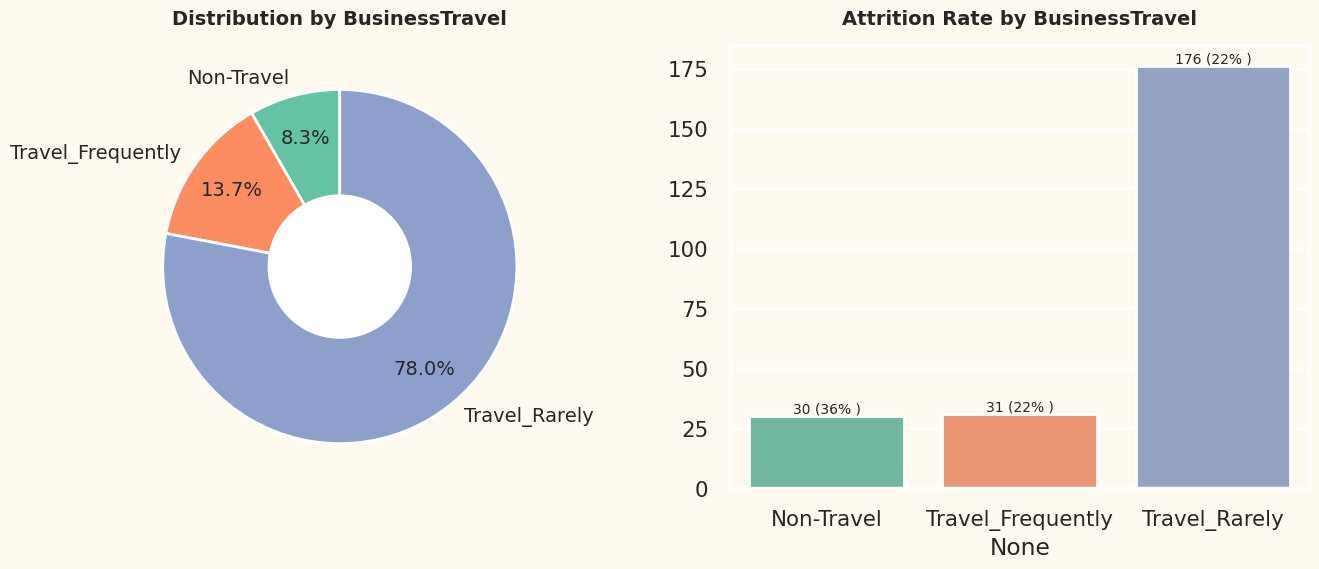

In [ ]:
pie_bar_plot(data, 'BusinessTravel', 'Attrition')

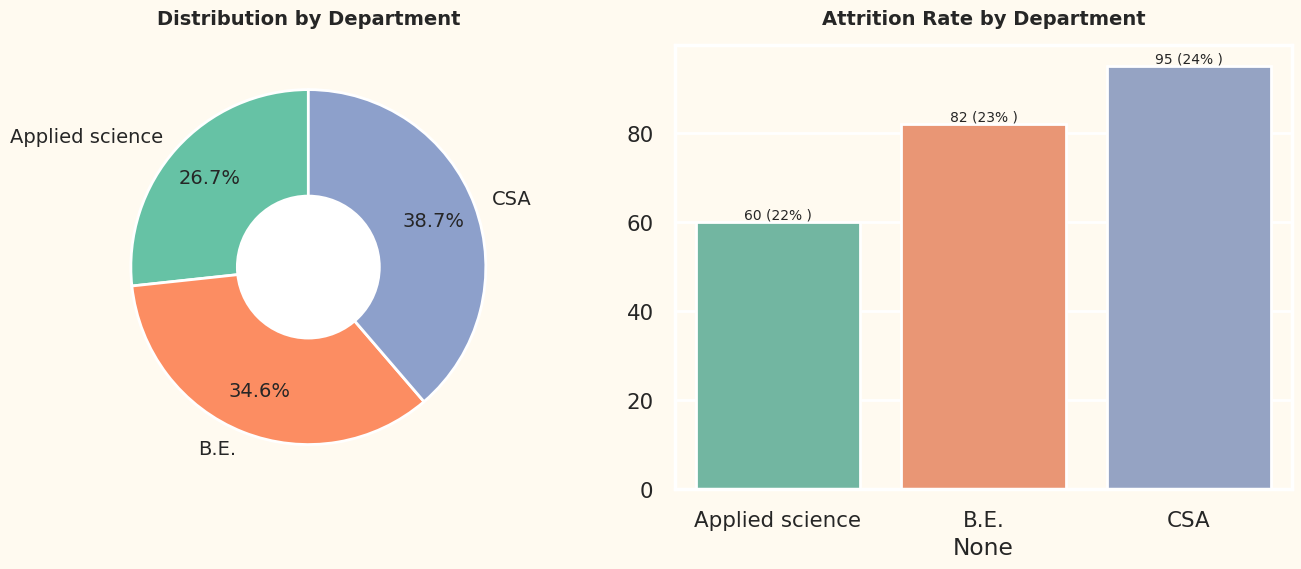

In [ ]:
pie_bar_plot(data, 'Department', 'Attrition')

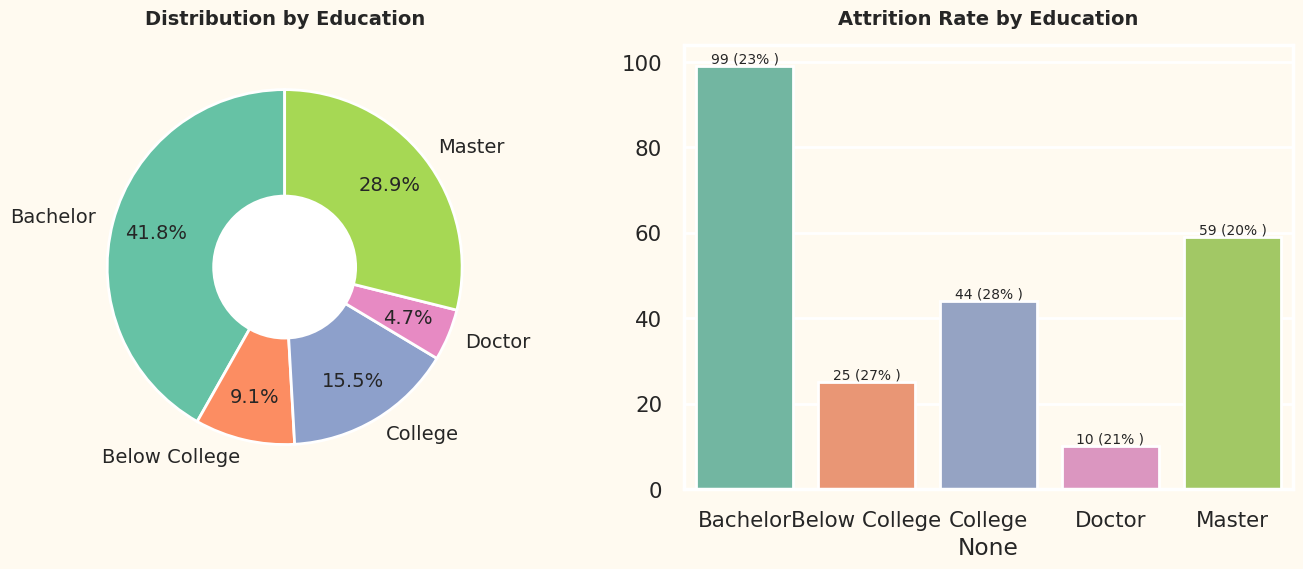

In [ ]:
pie_bar_plot(data, 'Education', 'Attrition')

In [ ]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

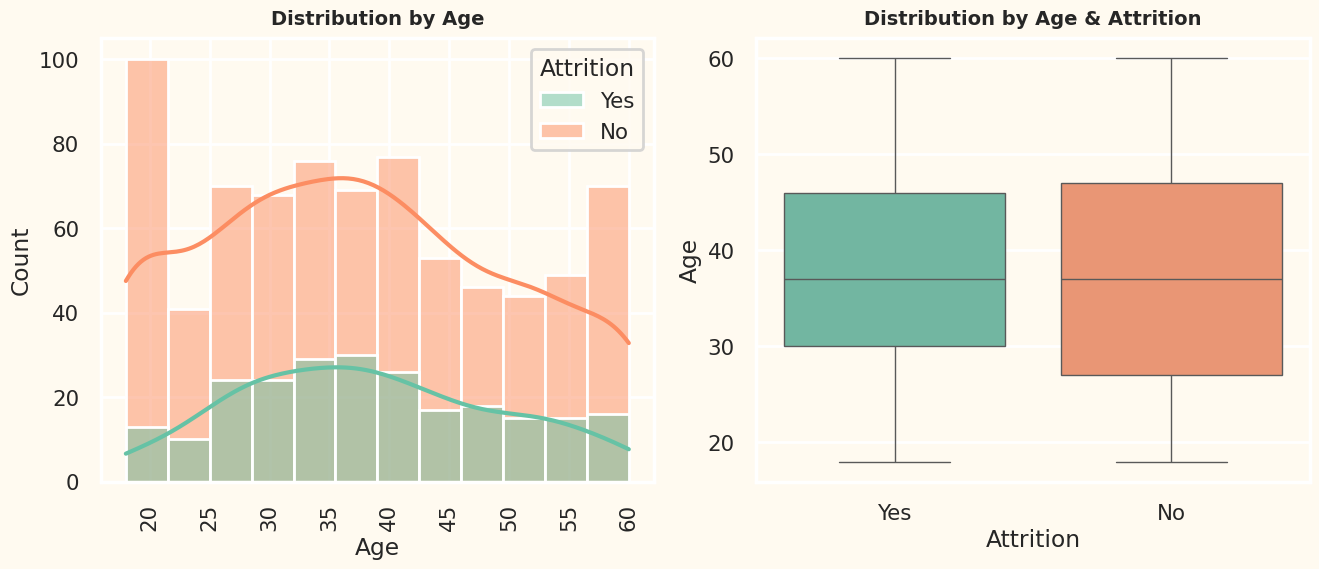

In [ ]:
hist_with_hue(data, 'Age', 'Attrition')

In [ ]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

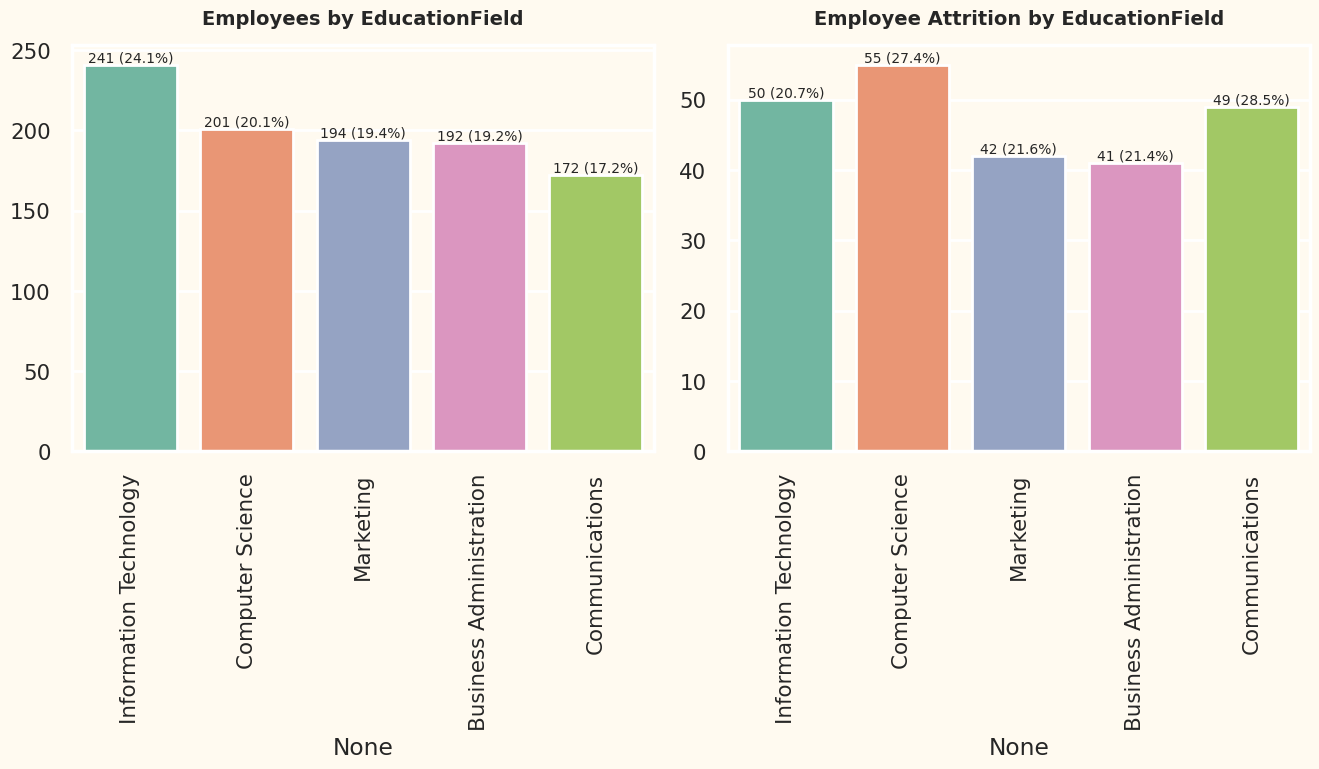

In [ ]:
count_percent_plot(data, 'EducationField', 'Attrition')

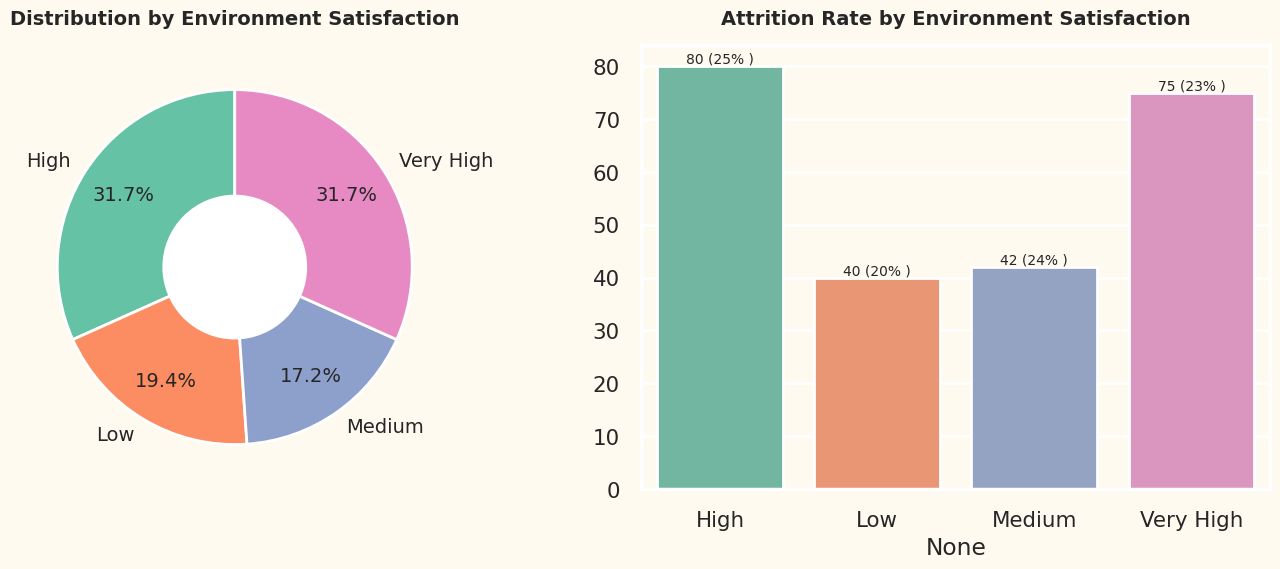

In [ ]:
pie_bar_plot(data, 'Environment Satisfaction', 'Attrition')

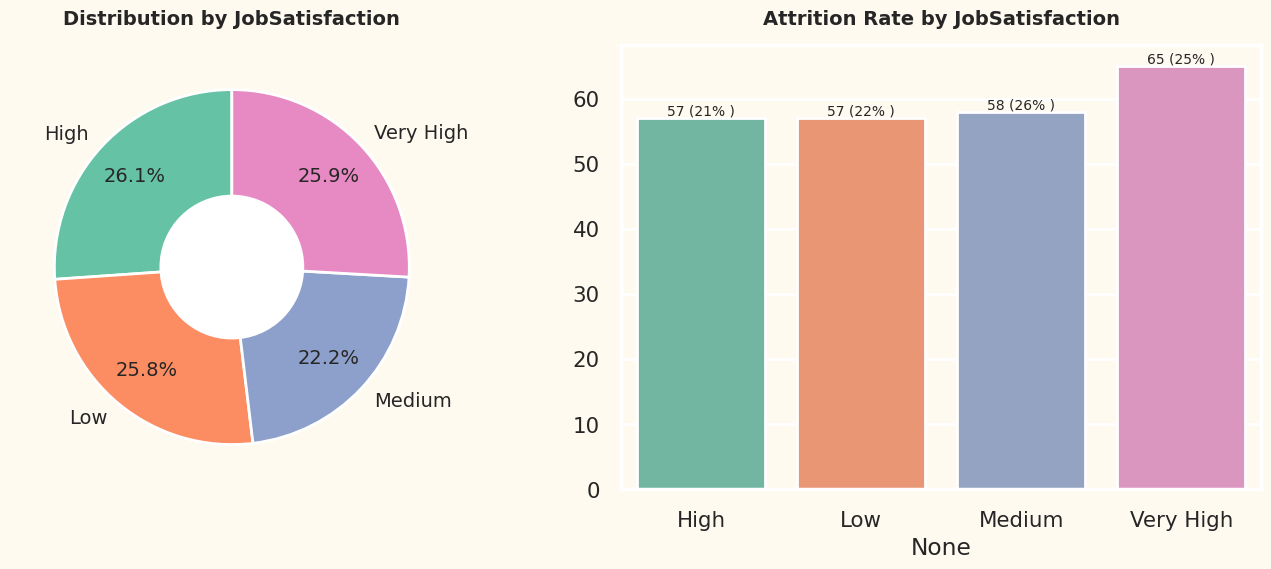

In [ ]:
pie_bar_plot(data, 'JobSatisfaction', 'Attrition')

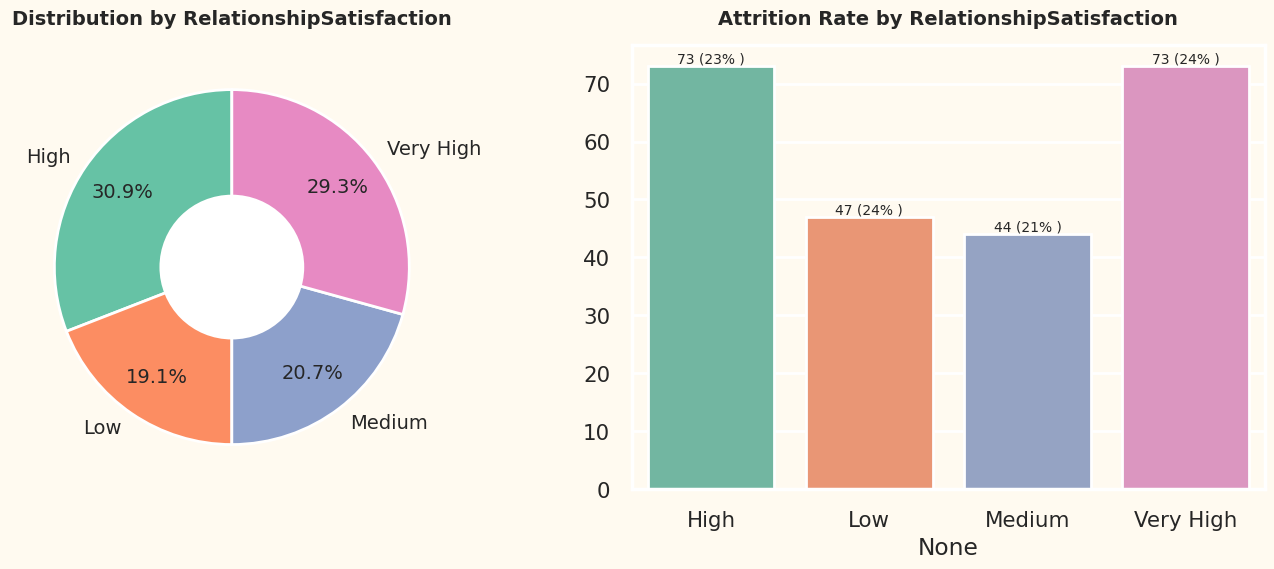

In [ ]:
pie_bar_plot(data, 'RelationshipSatisfaction', 'Attrition')

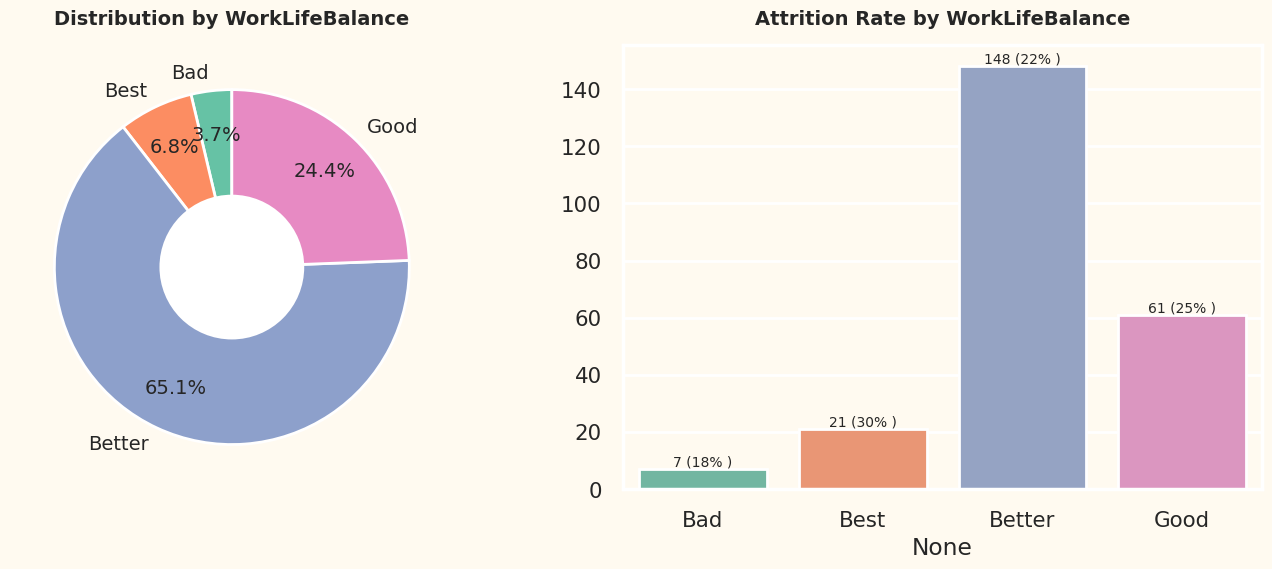

In [ ]:
pie_bar_plot(data, 'WorkLifeBalance', 'Attrition')

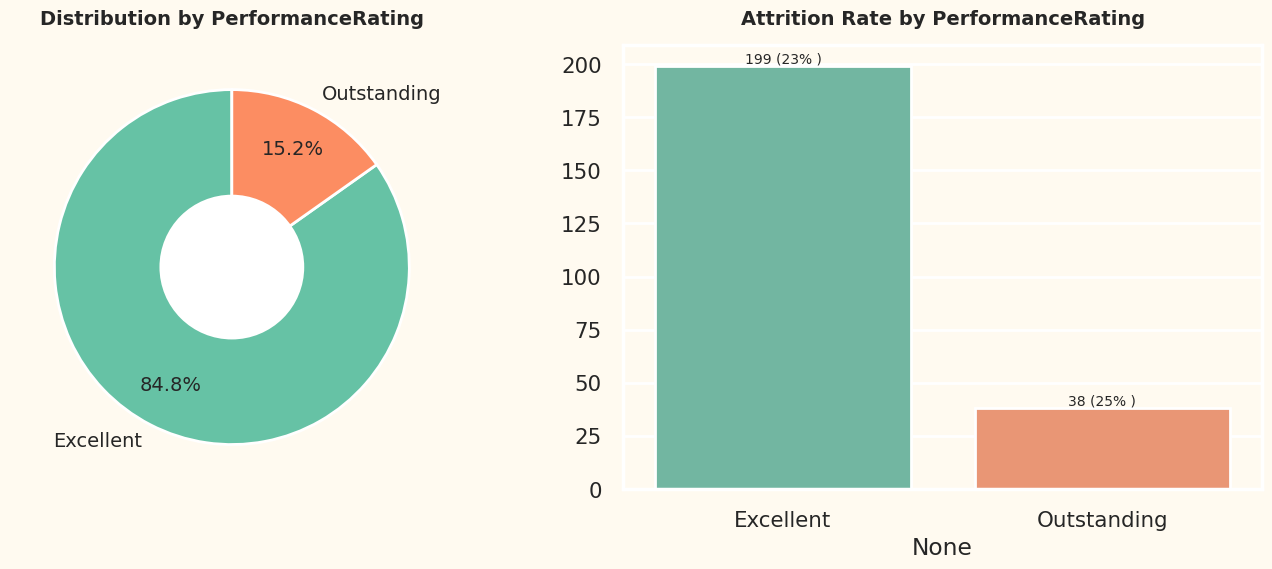

In [ ]:
pie_bar_plot(data, 'PerformanceRating', 'Attrition')

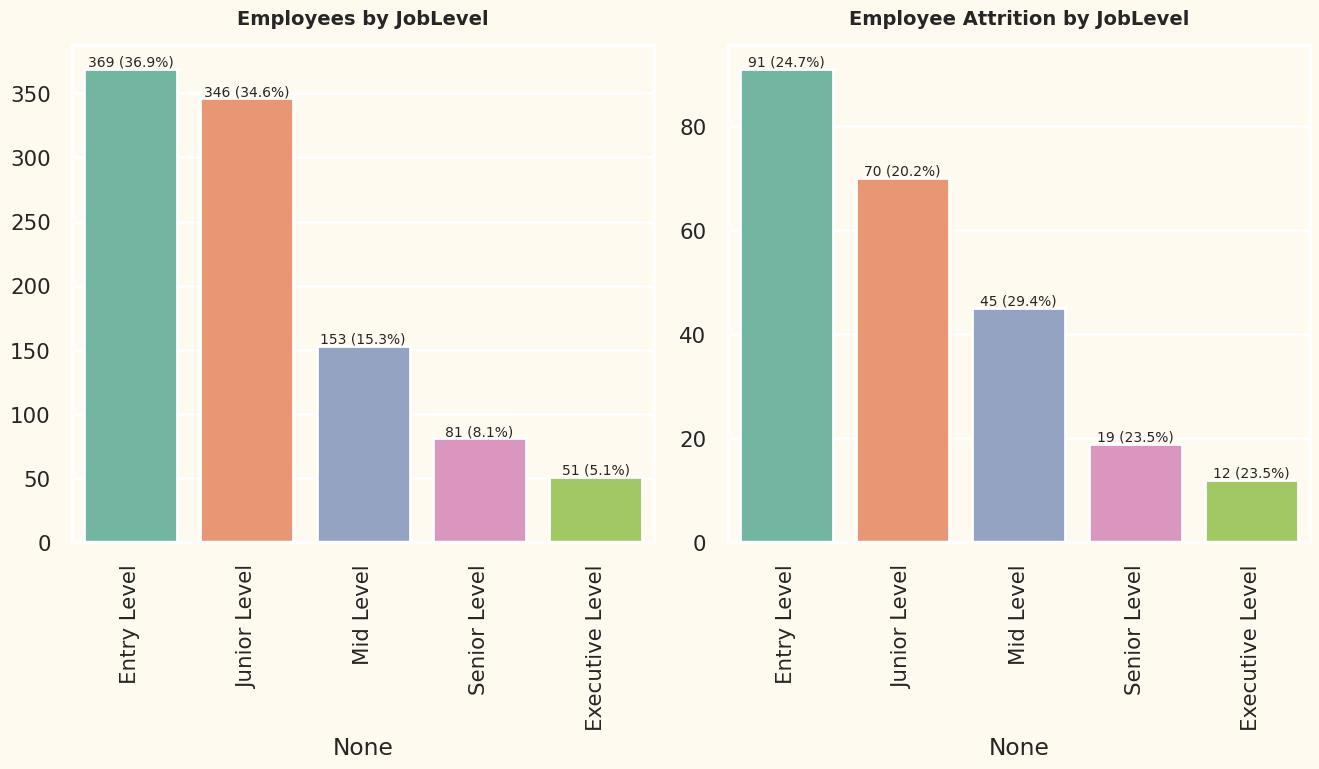

In [ ]:
count_percent_plot(data, 'JobLevel', 'Attrition')

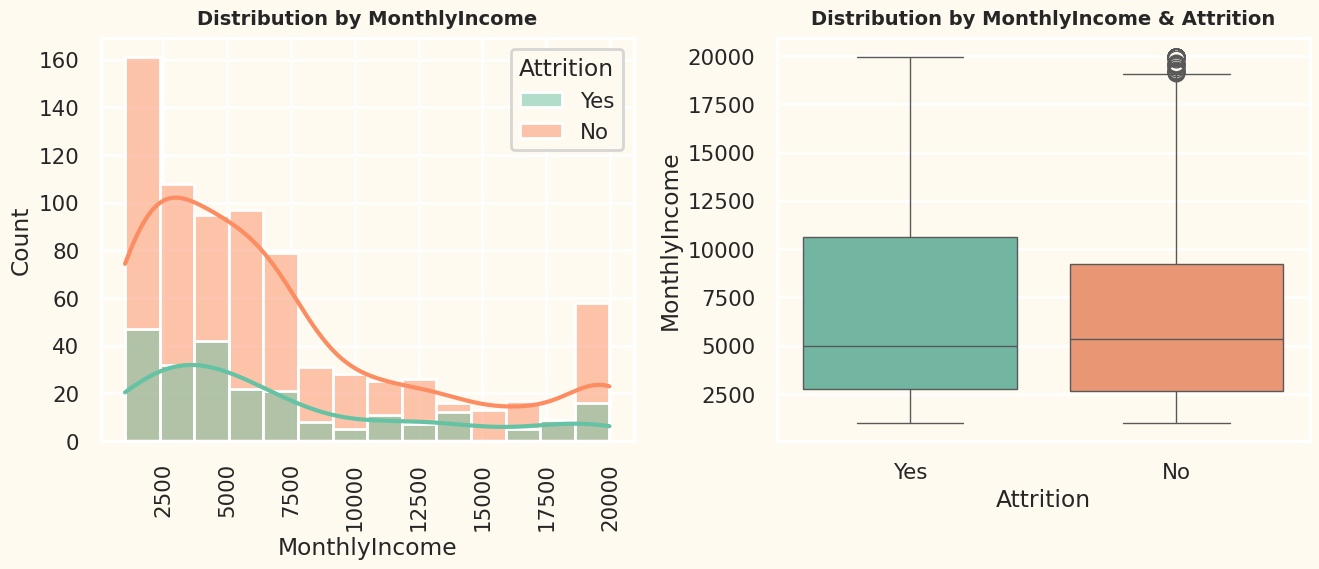

In [ ]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')

In [ ]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",data["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 50


In [ ]:
data["DistanceFromHome"].describe().to_frame().T

count    mean        std  min  25%  50%   75%   max
DistanceFromHome  1000.0  11.489  12.015001  0.0  3.0  8.0  16.0  60.0

In [ ]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
data['DistanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

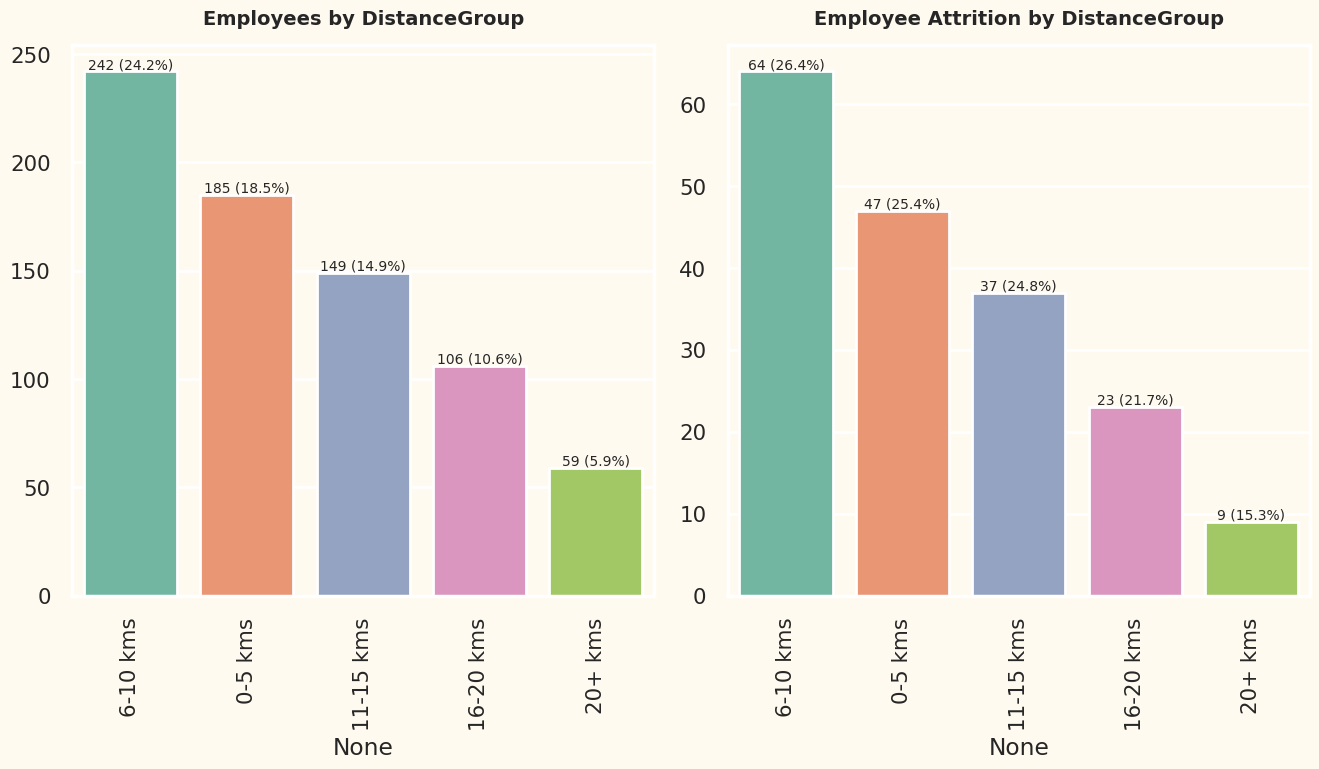

In [ ]:
count_percent_plot(data, 'DistanceGroup', 'Attrition')

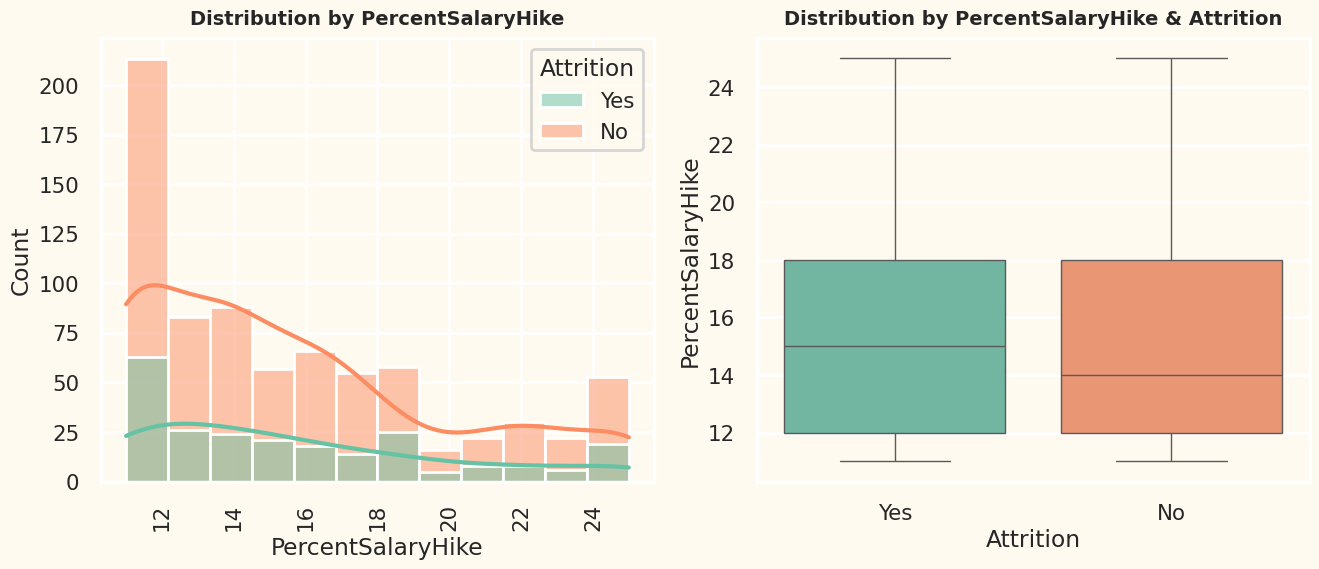

In [ ]:
hist_with_hue(data, 'PercentSalaryHike', 'Attrition')

In [ ]:
print("Total Unique Values in 'NumInstitutesWorked' Attribute is =>",data["NumInstitutesWorked"].nunique())

Total Unique Values in 'NumInstitutesWorked' Attribute is => 10


In [ ]:
data["NumInstitutesWorked"].describe().to_frame().T

count   mean       std  min  25%  50%  75%  max
NumInstitutesWorked  1000.0  1.742  2.301028  0.0  0.0  1.0  3.0  9.0

In [ ]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Institutes', '2-3 Institutes', '4-5 Institutes', "6-9 Institutes"]

# Cut the DailyRate column into groups
data["NumInstitutesWorkedGroup"] = pd.cut(data['NumInstitutesWorked'], bins=bin_edges, labels=bin_labels)

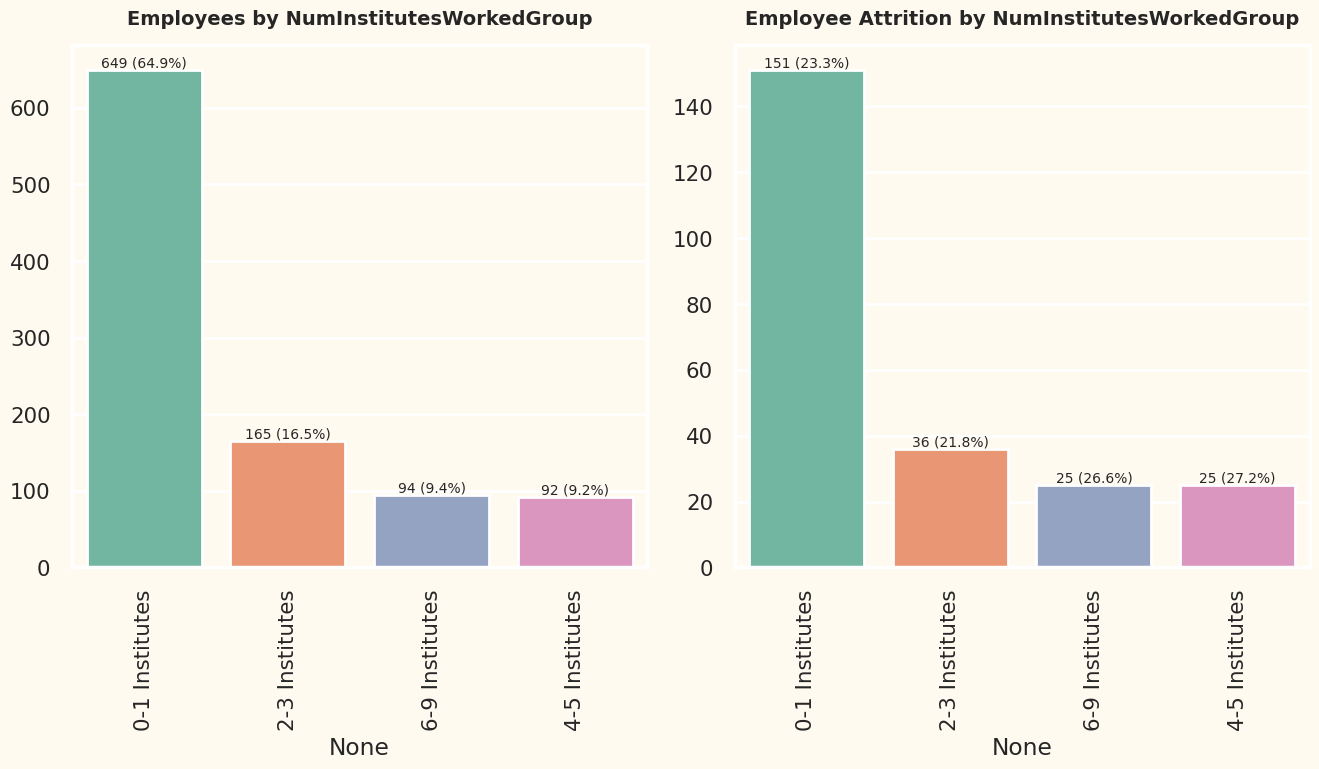

In [ ]:
count_percent_plot(data, 'NumInstitutesWorkedGroup', 'Attrition')

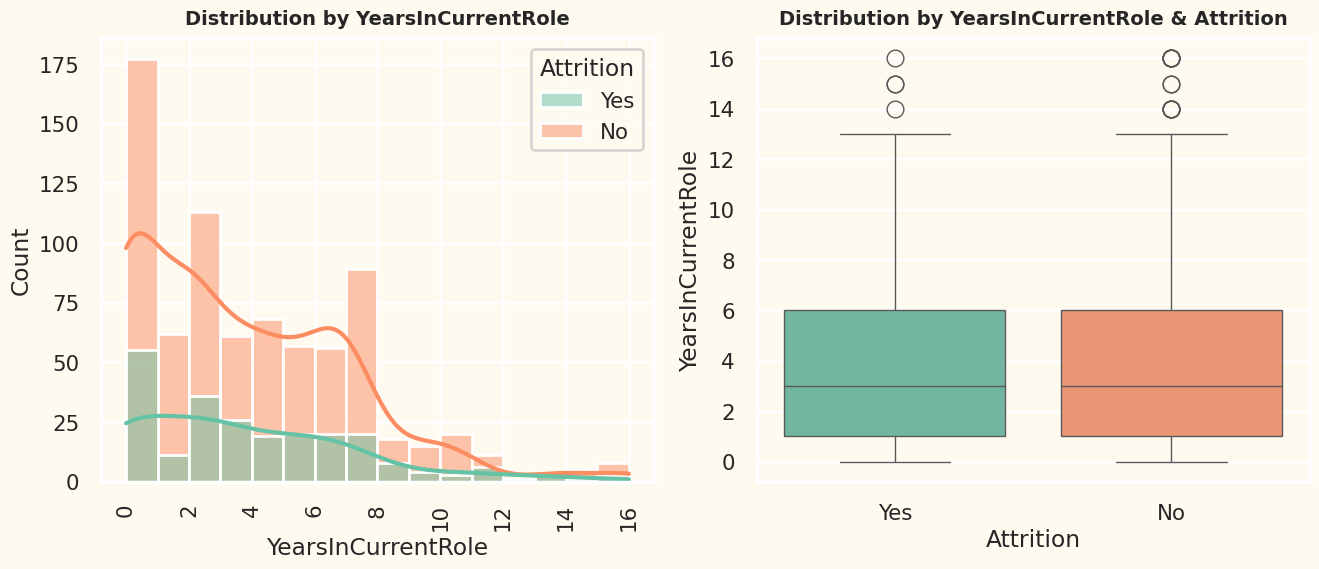

In [ ]:
hist_with_hue(data, 'YearsInCurrentRole', 'Attrition')

In [ ]:
num_cols = data.select_dtypes(np.number).columns

In [ ]:
new_data = data.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

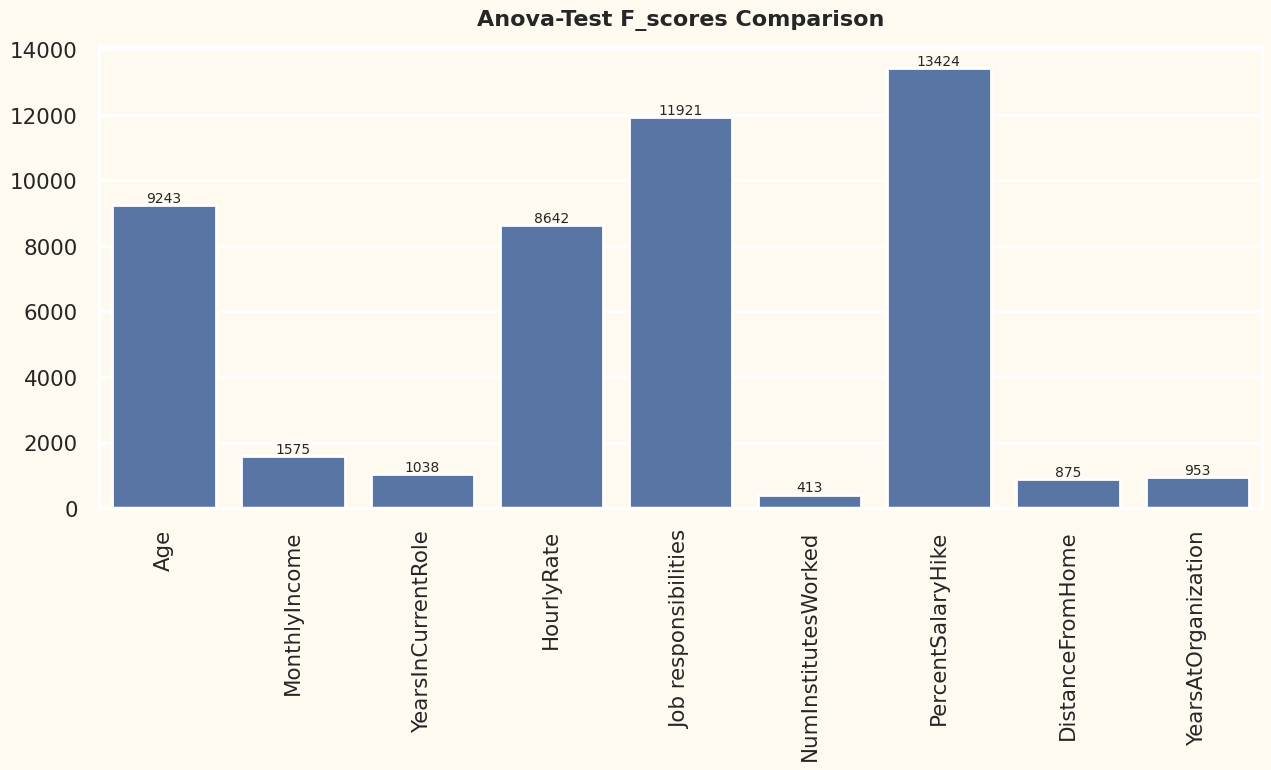

In [ ]:
import math  # Import the math module for isnan function

plt.figure(figsize=(15, 6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index, value in enumerate(values):
    if not math.isnan(value):  # Check if the value is not NaN
        plt.text(index, round(value), int(value), ha="center", va="bottom", size=10)

plt.show()

In [ ]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                   Age   9243.588119  0.00000000000000000000
1         MonthlyIncome   1575.838006  0.00000000000000000000
2    YearsInCurrentRole   1038.132609  0.00000000000000000000
3            HourlyRate   8642.799636  0.00000000000000000000
4  Job responsibilities  11921.941942  0.00000000000000000000
5   NumInstitutesWorked    413.647081  0.00000000000000000000
6     PercentSalaryHike  13424.515013  0.00000000000000000000
7      DistanceFromHome    875.926442  0.00000000000000000000
8   YearsAtOrganization    953.246797  0.00000000000000000000

In [ ]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [ ]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

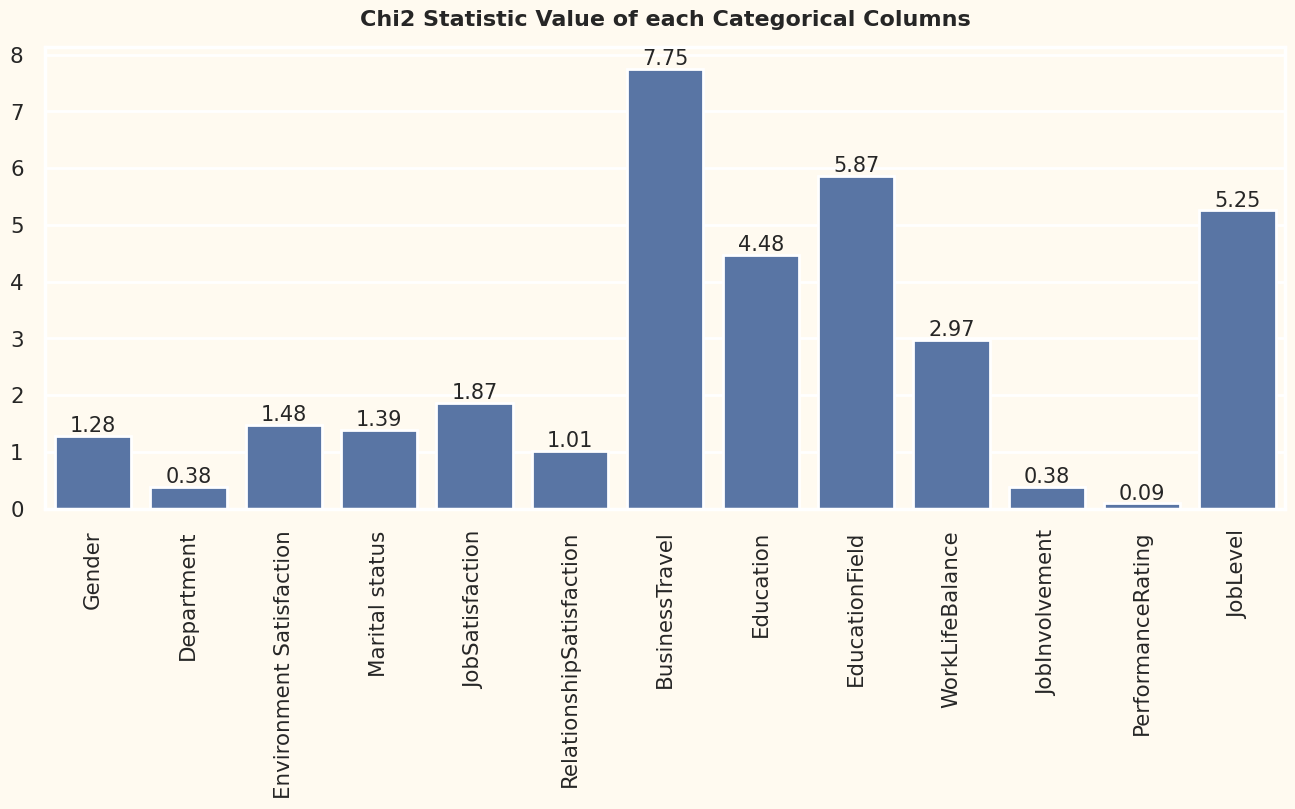

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [ ]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0                     Gender         1.280203  0.25786127302683009566
1                 Department         0.376515  0.82840152284928780801
2   Environment Satisfaction         1.481995  0.68643214376801831023
3             Marital status         1.391594  0.49867690847995105319
4            JobSatisfaction         1.870219  0.59977496016147036073
5   RelationshipSatisfaction         1.010723  0.79865735185306507837
6             BusinessTravel         7.751948  0.02073413080258936295
7                  Education         4.476363  0.34535946071787593237
8             EducationField         5.870063  0.20906445599325637619
9            WorkLifeBalance         2.971370  0.39606043632940124422
10            JobInvolvement         0.379009  0.94454371685603588649
11         PerformanceRating         0.093467  0.75981444333400904867
12                  JobLevel         5.254618  0.26215539087214512204

In [ ]:
data["Environment Satisfaction"] = data["Environment Satisfaction"].replace({"Low":0 ,"Medium":1, "High":2, "Very High":3})
data["JobInvolvement"] = data["JobInvolvement"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["PerformanceRating"] = data["PerformanceRating"].replace({"Low":0,"Good":1,"Excellent":2,"Outstanding":3})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({"Bad":0,"Good":1,"Better":2,"Best":3})
data["Education"] = data["Education"].replace({"Below College":0,"College":1,"Bachelor":2,"Master":3,"Doctor":4})
data["JobLevel"] = data["JobLevel"].replace({"Entry Level":0,"Junior Level":1,"Mid Level":2,"Senior Level":3,"Executive Level":4})
data["Gender"] = data["Gender"].replace({"Female":0 ,"Male":1})
data["Attrition"] = data["Attrition"].replace({"No":0 ,"Yes":1})

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Department', 'Marital status', 'BusinessTravel', 'EducationField']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Marital status'] = le.fit_transform(data['Marital status'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1000 non-null   int64   
 1   Gender                    1000 non-null   int64   
 2   Attrition                 1000 non-null   int64   
 3   Department                1000 non-null   int64   
 4   Environment Satisfaction  1000 non-null   int64   
 5   Marital status            1000 non-null   int64   
 6   MonthlyIncome             1000 non-null   int64   
 7   YearsInCurrentRole        1000 non-null   int64   
 8   HourlyRate                1000 non-null   int64   
 9   Job responsibilities      1000 non-null   int64   
 10  JobSatisfaction           1000 non-null   int64   
 11  NumInstitutesWorked       1000 non-null   int64   
 12  PercentSalaryHike         1000 non-null   int64   
 13  RelationshipSatisfaction  1000 non-null   int64  

In [ ]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumInstitutesWorkedGroup"]
data.drop(columns=cols, inplace=True)

<Axes: title={'center': 'Correlation Plot'}>

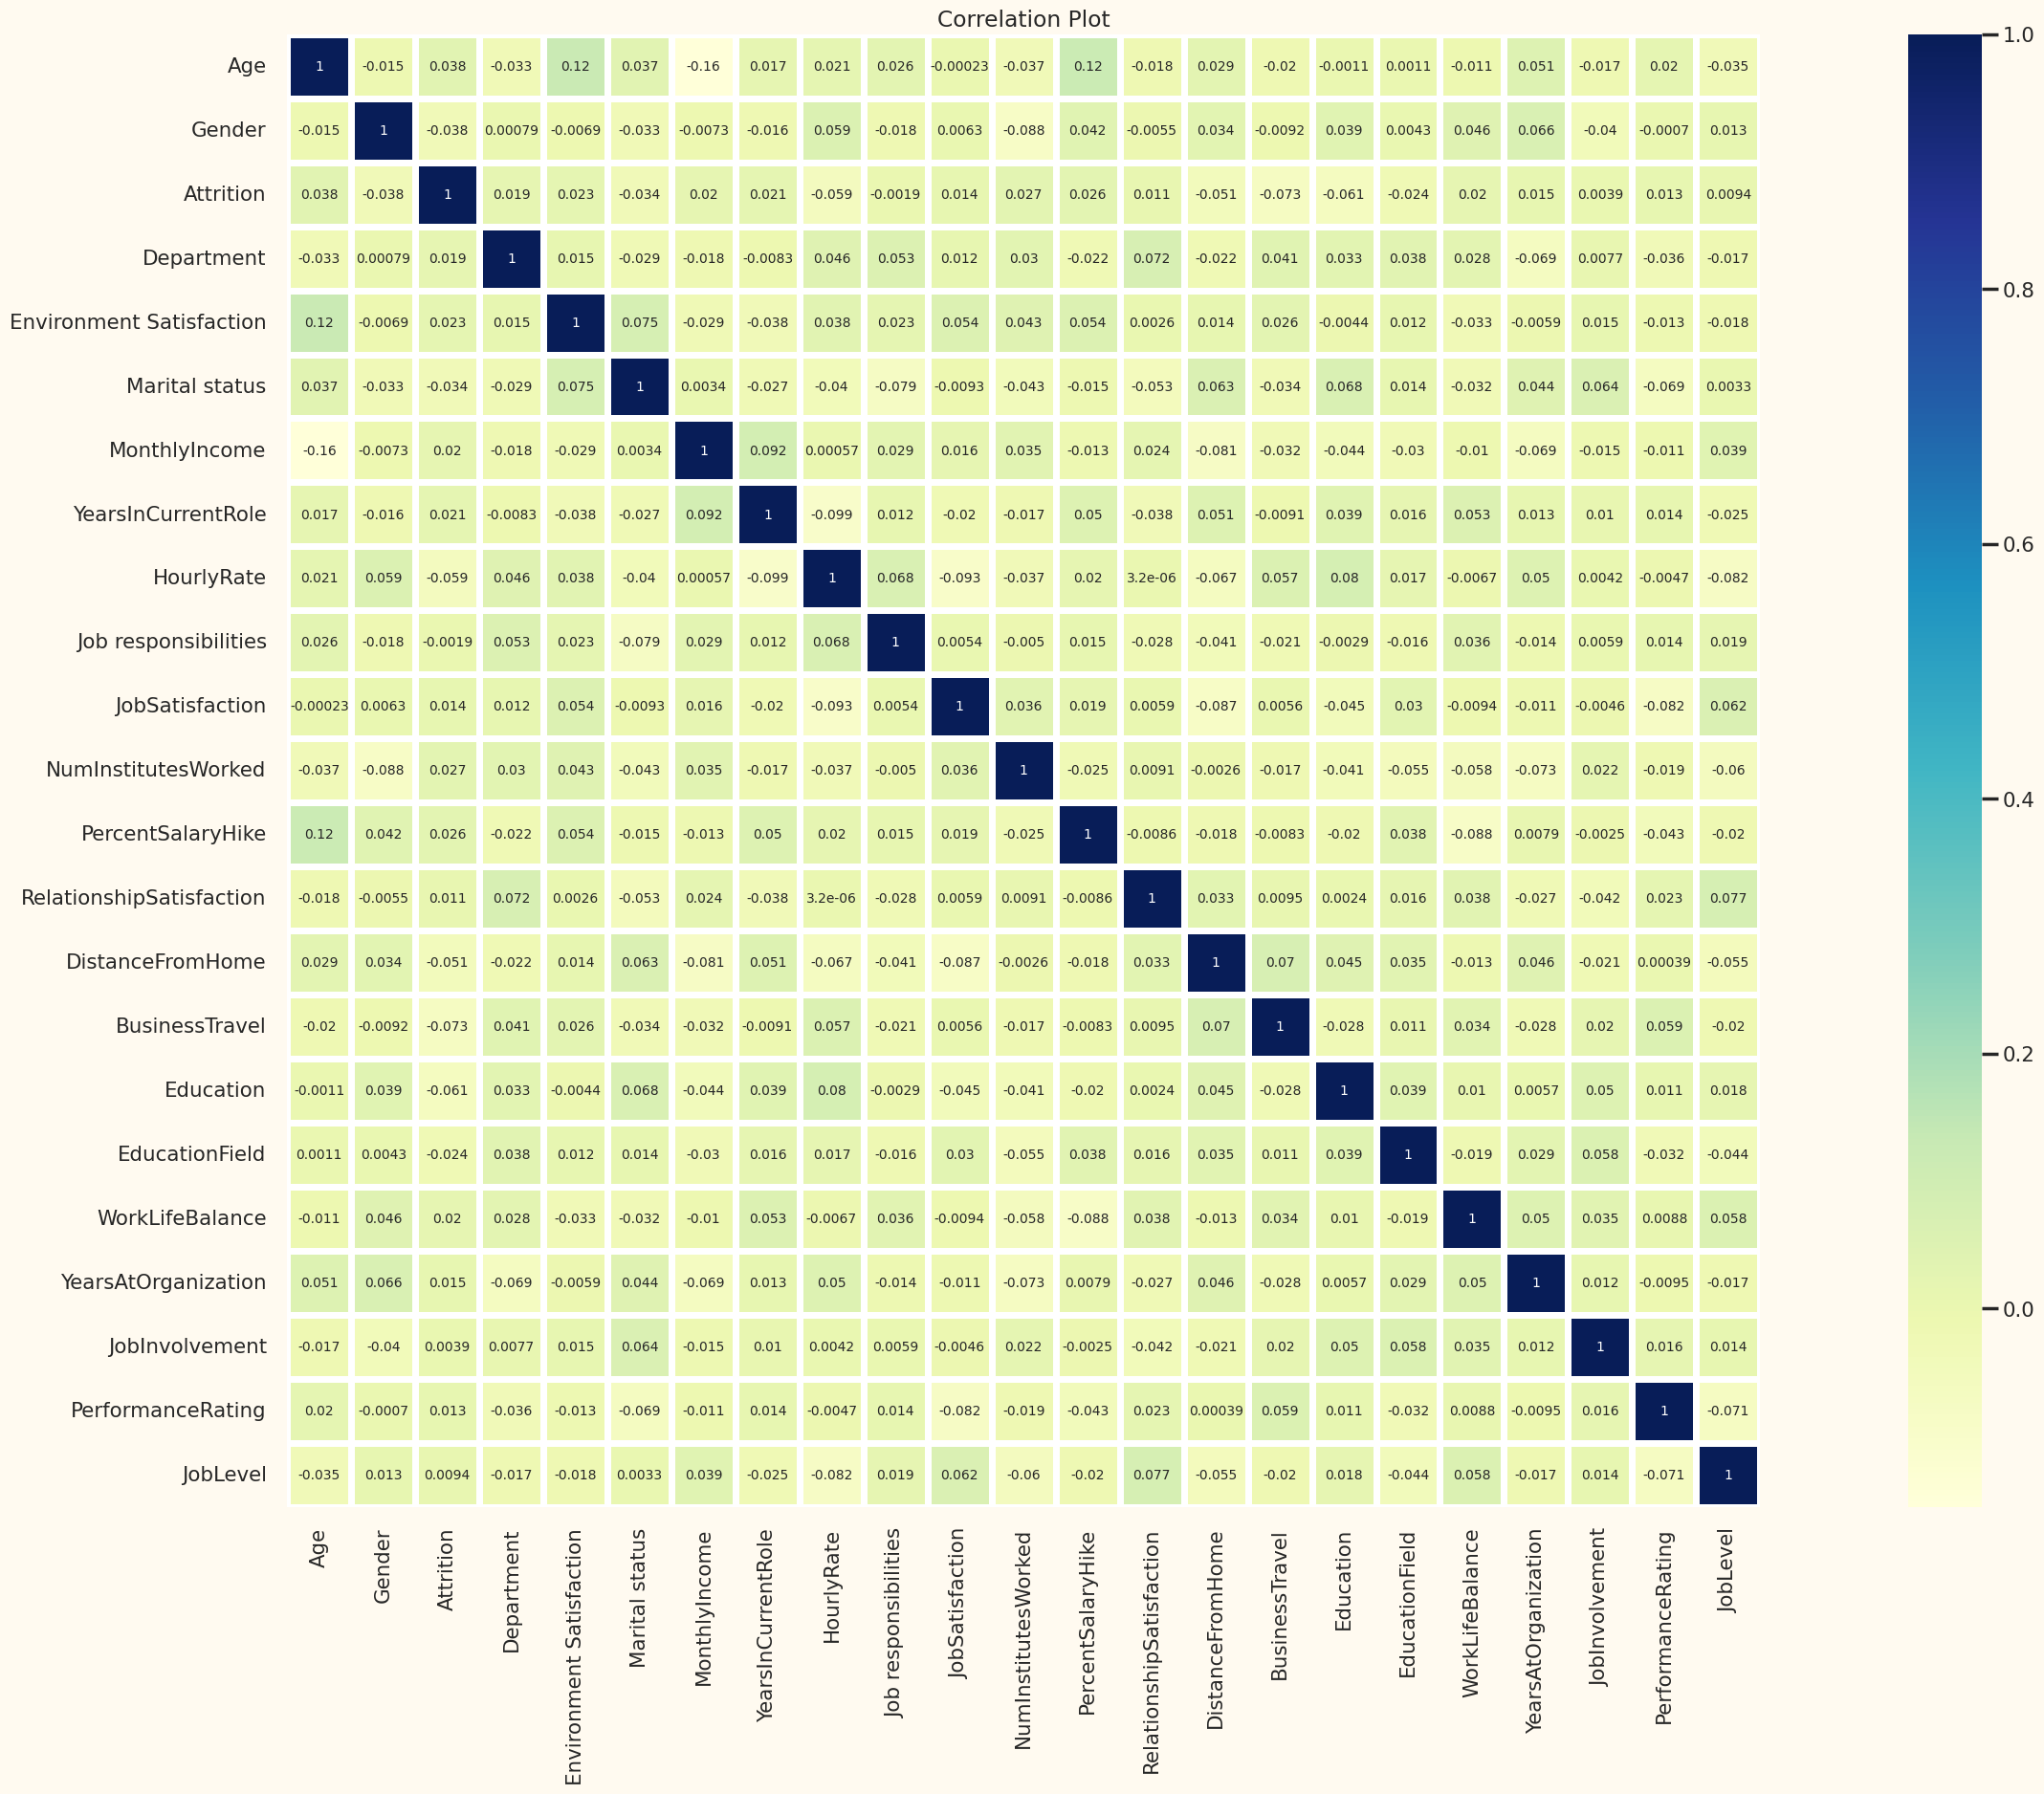

In [ ]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

# Optionally, you can filter the correlation matrix to display only the highly correlated values
correlation_matrix.where(high_correlation_mask, inplace=True)

Highly correlated features:


In [ ]:
# droping columns which are highly correlated

cols = ["PercentSalaryHike", "YearsInCurrentRole"]
data.drop(columns=cols, inplace=True)

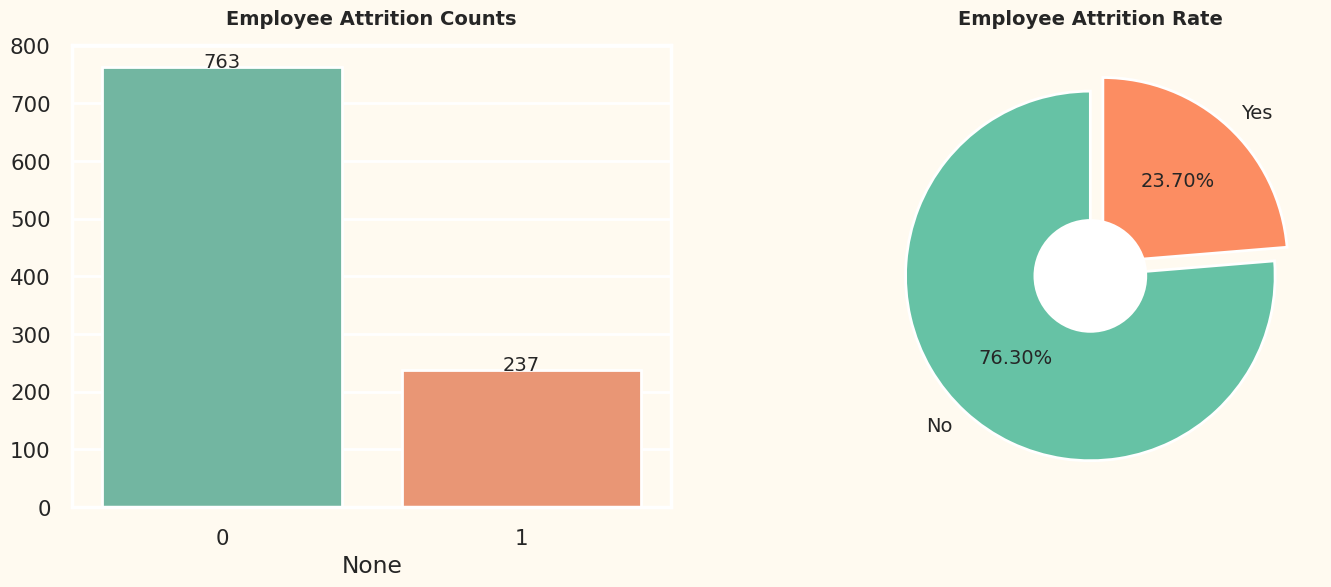

In [ ]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

In [ ]:
x = data.drop(['Attrition'], axis=1)
y = data[['Attrition']]

In [ ]:
x.head()

Age  Gender  Department  Environment Satisfaction  Marital status  \
0   38       0           1                         3               2   
1   38       1           2                         3               2   
2   27       1           0                         2               2   
3   49       1           1                         3               1   
4   34       1           2                         3               2   

   MonthlyIncome  HourlyRate  Job responsibilities  JobSatisfaction  \
0           4449          72                     5                2   
1           2218          98                     4                0   
2          19197          52                     4                2   
3          13212          86                     4                0   
4           6577          83                     4                2   

   NumInstitutesWorked  RelationshipSatisfaction  DistanceFromHome  \
0                    0                         1                 5   
1                    6                         0                15   
2                    0                         2                25   
3                    0                         0                 5   
4                    1                         3                16   

   BusinessTravel  Education  EducationField  WorkLifeBalance  \
0               2          2               0                2   
1               0          2               1                2   
2               2          1               2                1   
3               2          0               3                2   
4               2          1               4                2   

   YearsAtOrganization  JobInvolvement  PerformanceRating  JobLevel  
0                   10               2                  2         3  
1                    0               2                  2         1  
2                    8               2                  3         0  
3                    2               2                  2         0  
4                    7               2                  2         0

In [ ]:
y.head()

Attrition
0          1
1          0
2          1
3          1
4          0

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Attrition
0            763
1            237
dtype: int64

Attrition
0            763
1            763
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [ ]:
import numpy
x_scaled = scaler.fit_transform(x_smote)
data_scaled = scaler.fit_transform(numpy.array(data))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1220, 20) (1220, 1) (306, 20) (306, 1)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [ ]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(1220, 20) (1220, 1) (306, 20) (306, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *

In [ ]:
training_score = []
testing_score = []
precission = []
recall = []
auc_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    auc_score.append(e)


    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 70.49180327868852
Accuracy_Score of LogisticRegression() model on Testing Data is: 69.28104575163398

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.6685714285714286
Recall Score of LogisticRegression() model is: 0.7647058823529411
AUC Score of LogisticRegression() model is: 0.7697039600153787

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


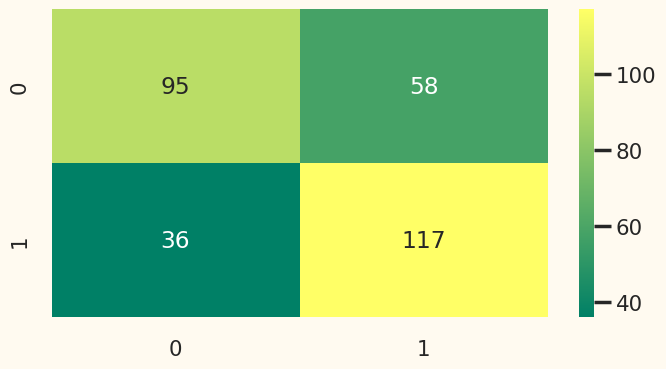


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


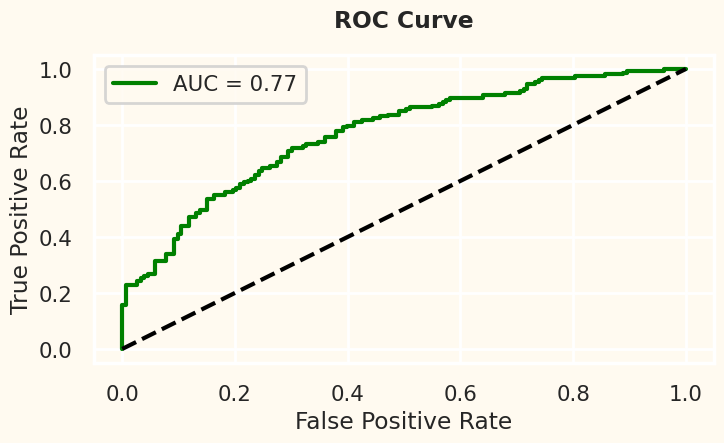

In [ ]:
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 82.78688524590164
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 72.54901960784314

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.6619718309859155
Recall Score of KNeighborsClassifier() model is: 0.9215686274509803
AUC Score of KNeighborsClassifier() model is: 0.8182750224272715

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


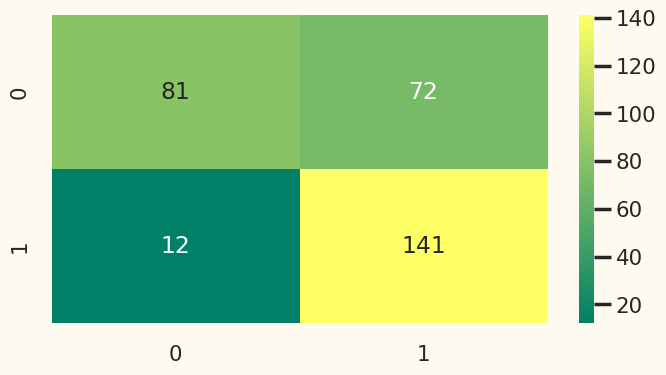


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


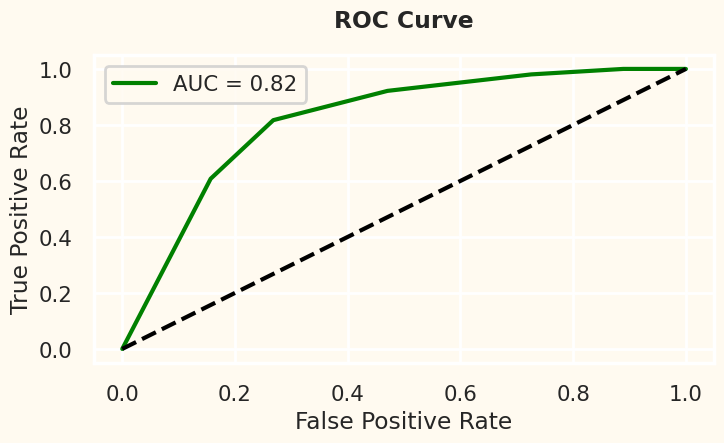

In [ ]:
model_prediction(KNeighborsClassifier())

Accuracy_Score of GaussianNB() model on Training Data is: 72.54098360655738
Accuracy_Score of GaussianNB() model on Testing Data is: 68.30065359477125

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.6473684210526316
Recall Score of GaussianNB() model is: 0.803921568627451
AUC Score of GaussianNB() model is: 0.7828185740527148

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


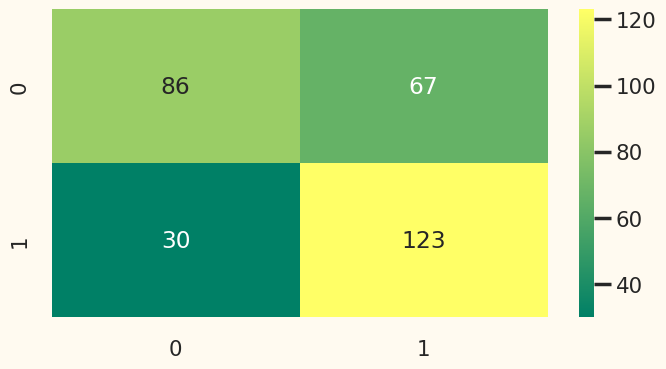


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


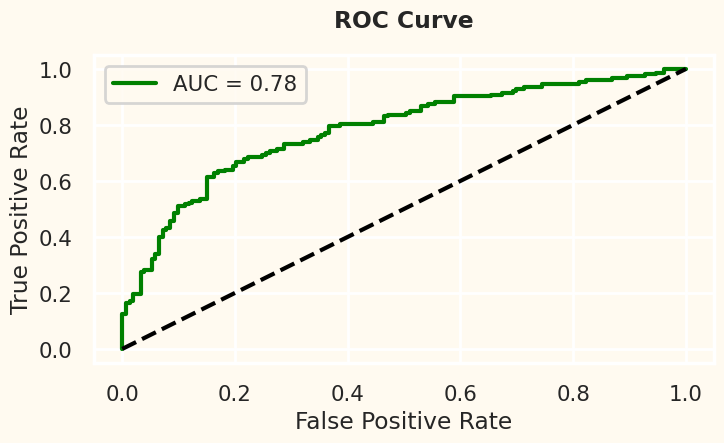

In [ ]:
model_prediction(GaussianNB())

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    auc_score.append(e)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 75.81699346405229

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7484276729559748
Recall Score of DecisionTreeClassifier() model is: 0.7777777777777778
AUC Score of DecisionTreeClassifier() model is: 0.758169934640523

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       153
           1       0.75      0.78      0.76       153

    accuracy                           0.76       306
   macro avg       0.76      0.76      0.76       306
weighted avg       0.76      0.76      0.76       306


------------------------------------------------------------------------
Confusion Matrix of

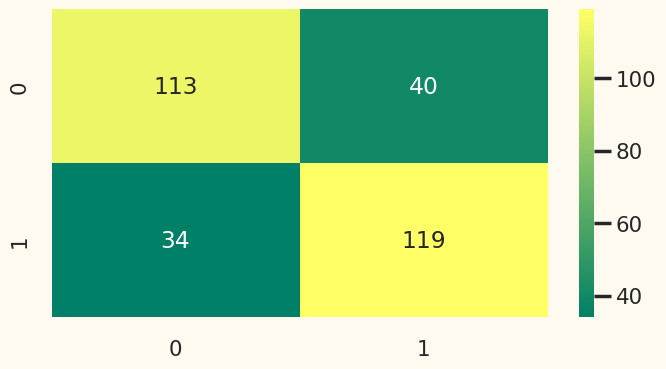


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


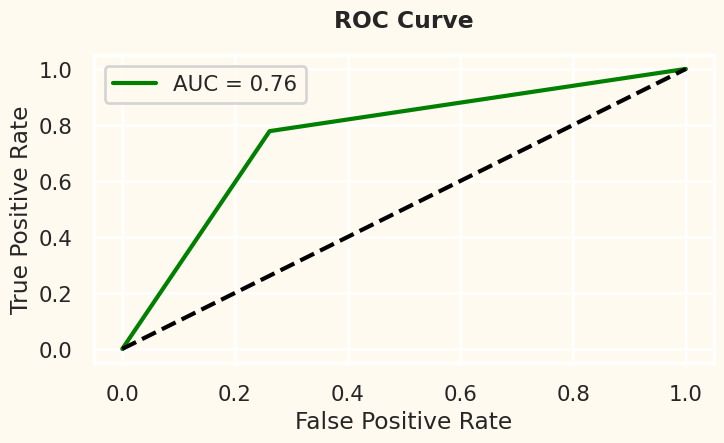

In [ ]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 81.04575163398692

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8145695364238411
Recall Score of RandomForestClassifier() model is: 0.803921568627451
AUC Score of RandomForestClassifier() model is: 0.8986714511512667

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       153
           1       0.81      0.80      0.81       153

    accuracy                           0.81       306
   macro avg       0.81      0.81      0.81       306
weighted avg       0.81      0.81      0.81       306


------------------------------------------------------------------------
Confusion Matrix of

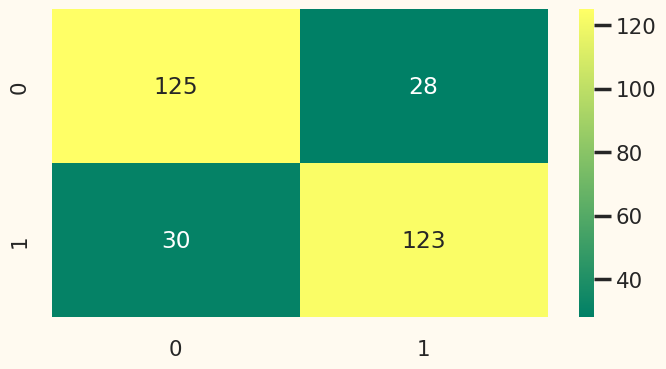


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


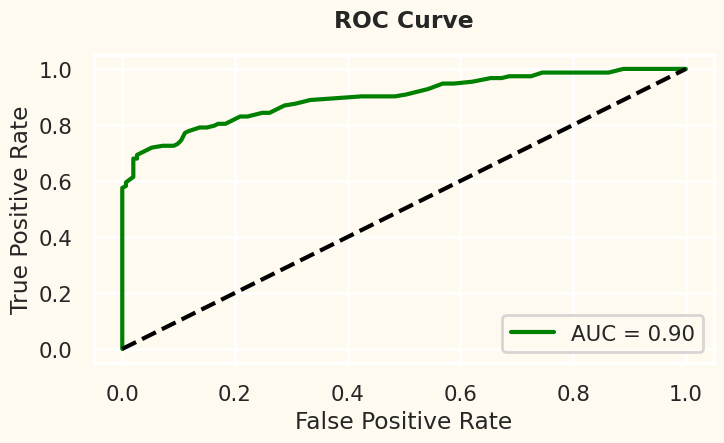

In [ ]:
model_prediction(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 77.45901639344262
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 72.22222222222221

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.6910112359550562
Recall Score of AdaBoostClassifier() model is: 0.803921568627451
AUC Score of AdaBoostClassifier() model is: 0.808321585714896

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       153
           1       0.69      0.80      0.74       153

    accuracy                           0.72       306
   macro avg       0.73      0.72      0.72       306
weighted avg       0.73      0.72      0.72       306


------------------------------------------------------------------------
Confusion Matrix of AdaBoostClas

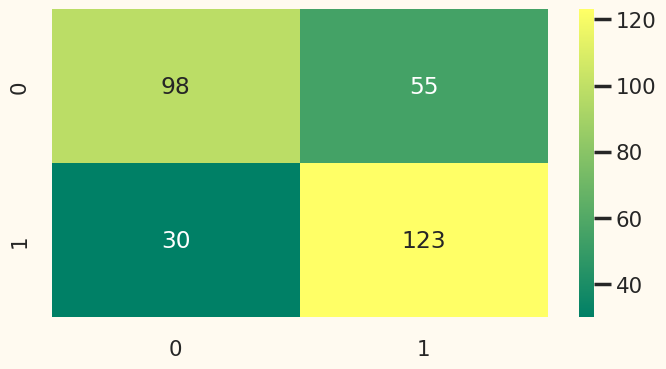


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


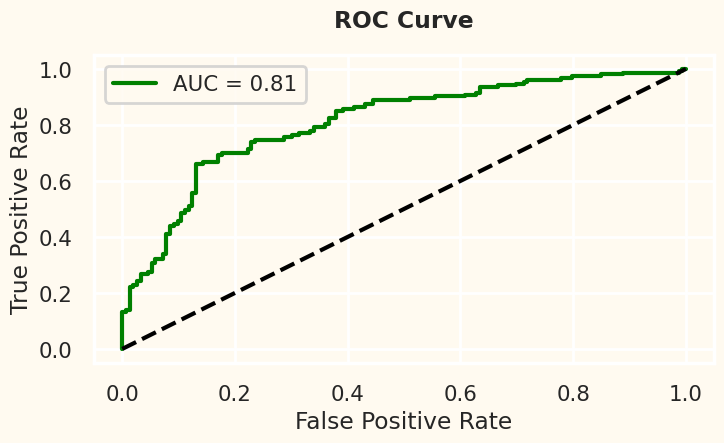

In [ ]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 89.8360655737705
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 73.8562091503268

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7134502923976608
Recall Score of GradientBoostingClassifier() model is: 0.7973856209150327
AUC Score of GradientBoostingClassifier() model is: 0.8591567345892606

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       153
           1       0.71      0.80      0.75       153

    accuracy                           0.74       306
   macro avg       0.74      0.74      0.74       306
weighted avg       0.74      0.74      0.74       306


---------------------------------------------------------

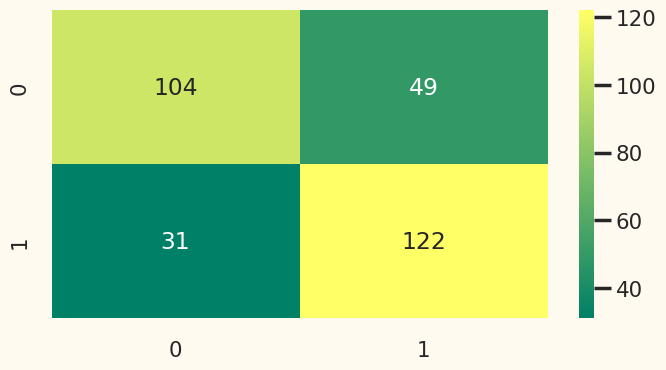


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


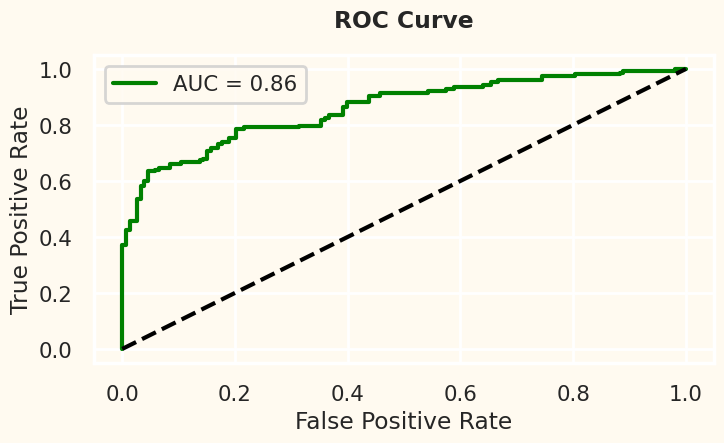

In [ ]:
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

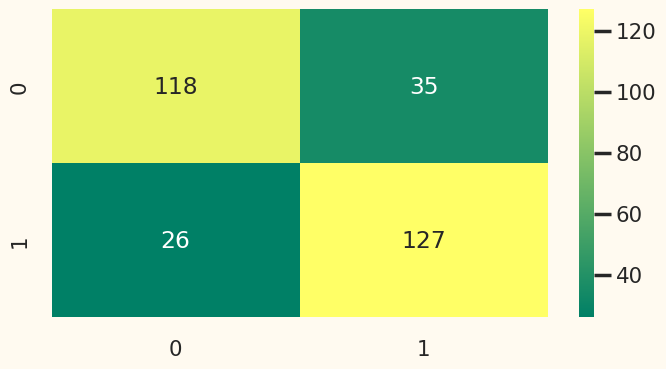


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


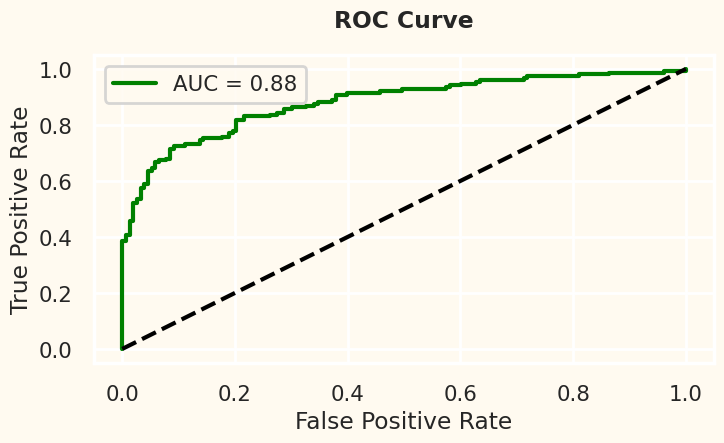

In [ ]:
model_prediction(XGBClassifier())

In [ ]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost"]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                  "Precision": precission,
                  "Recall": recall,
                  "AUC Score": auc_score})
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0  Logistic Regression       70.491803      69.281046   0.668571  0.764706   
1                  KNN       82.786885      72.549020   0.661972  0.921569   
2          Naive Bayes       72.540984      68.300654   0.647368  0.803922   
3        Decision Tree      100.000000      75.816993   0.748428  0.777778   
4        Random Forest      100.000000      81.045752   0.814570  0.803922   
5            Ada Boost       77.459016      72.222222   0.691011  0.803922   
6       Gradient Boost       89.836066      73.856209   0.713450  0.797386   
7              XGBoost      100.000000      80.065359   0.783951  0.830065   

   AUC Score  
0   0.769704  
1   0.818275  
2   0.782819  
3   0.758170  
4   0.898671  
5   0.808322  
6   0.859157  
7   0.880388

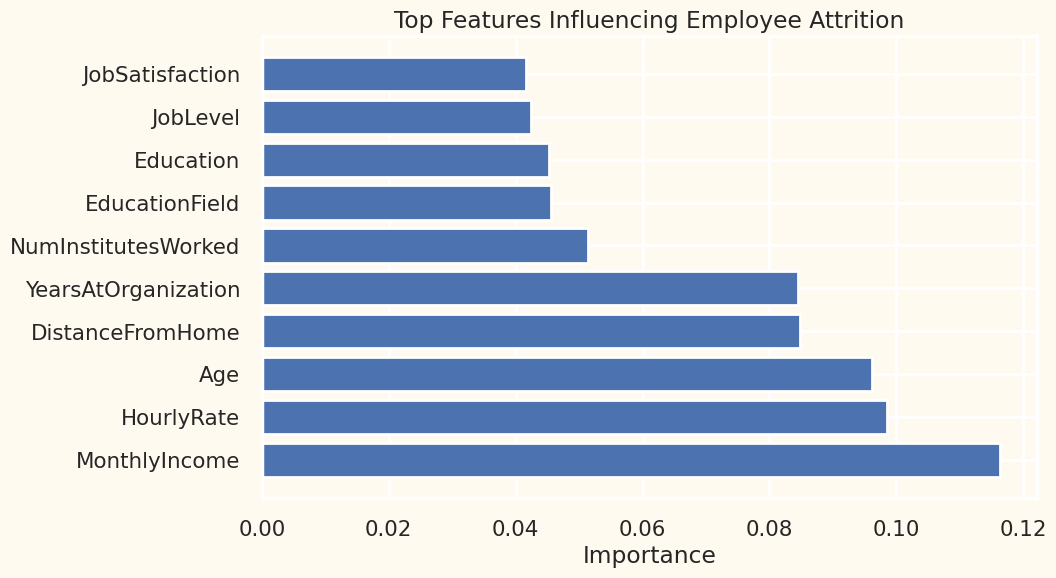

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'X' is your feature set and 'y' is the target variable
model_rf = RandomForestClassifier()
model_rf.fit(x, y)

# Get feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N features
top_n = 10  # Adjust this value based on the number of features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title('Top Features Influencing Employee Attrition')
plt.show()

In [ ]:
attrition_count = sum(data['Attrition'].astype(str).str.lower().isin(['yes', 'y', '1']))

In [ ]:
# Assuming 'data' is your DataFrame and 'Attrition' is the target variable
attrition_count = data['Attrition'].astype(int).sum()
total_employees = len(data)

attrition_rate = (attrition_count / total_employees) * 100
print(f"The attrition rate is: {attrition_rate:.2f}%")

The attrition rate is: 23.70%


In [ ]:
data.head()

Age  Gender  Attrition  Department  Environment Satisfaction  \
0   38       0          1           1                         3   
1   38       1          0           2                         3   
2   27       1          1           0                         2   
3   49       1          1           1                         3   
4   34       1          0           2                         3   

   Marital status  MonthlyIncome  HourlyRate  Job responsibilities  \
0               2           4449          72                     5   
1               2           2218          98                     4   
2               2          19197          52                     4   
3               1          13212          86                     4   
4               2           6577          83                     4   

   JobSatisfaction  NumInstitutesWorked  RelationshipSatisfaction  \
0                2                    0                         1   
1                0                    6                         0   
2                2                    0                         2   
3                0                    0                         0   
4                2                    1                         3   

   DistanceFromHome  BusinessTravel  Education  EducationField  \
0                 5               2          2               0   
1                15               0          2               1   
2                25               2          1               2   
3                 5               2          0               3   
4                16               2          1               4   

   WorkLifeBalance  YearsAtOrganization  JobInvolvement  PerformanceRating  \
0                2                   10               2                  2   
1                2                    0               2                  2   
2                1                    8               2                  3   
3                2                    2               2                  2   
4                2                    7               2                  2   

   JobLevel  
0         3  
1         1  
2         0  
3         0  
4         0

In [ ]:
ful = data[["Age","Gender","Attrition","Department","Environment Satisfaction","Marital status","MonthlyIncome","HourlyRate","Job responsibilities","JobSatisfaction","NumInstitutesWorked","RelationshipSatisfaction","DistanceFromHome","BusinessTravel","Education","EducationField","WorkLifeBalance","YearsAtOrganization","JobInvolvement","PerformanceRating","JobLevel"]]

In [ ]:
def cramers_V(v1,v2):
    crosstab = n.array(p.crosstab(v1,v2,rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = n.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

In [ ]:
import numpy as n
import pandas as p

In [ ]:
rows = []
for v1 in ful:
    col = []
    for v2 in ful:
        cramers = cramers_V(ful[v1],ful[v2])
        col.append(round(cramers,2))
    rows.append(col)
cramers_results = n.array(rows)
whole = p.DataFrame(cramers_results, columns = ful.columns, index = ful.columns)

In [ ]:
whole

Age  Gender  Attrition  Department  \
Age                       1.00    0.06       0.06        0.04   
Gender                    0.06    0.99       0.00        0.00   
Attrition                 0.06    0.00       0.99        0.00   
Department                0.04    0.00       0.00        1.00   
Environment Satisfaction  0.04    0.00       0.00        0.00   
Marital status            0.04    0.00       0.00        0.00   
MonthlyIncome             0.82    0.85       0.85        0.82   
HourlyRate                0.07    0.05       0.07        0.06   
Job responsibilities      0.05    0.00       0.00        0.00   
JobSatisfaction           0.04    0.01       0.00        0.00   
NumInstitutesWorked       0.04    0.02       0.02        0.01   
RelationshipSatisfaction  0.04    0.00       0.00        0.00   
DistanceFromHome          0.05    0.04       0.03        0.06   
BusinessTravel            0.05    0.00       0.01        0.00   
Education                 0.04    0.01       0.00        0.00   
EducationField            0.05    0.00       0.01        0.00   
WorkLifeBalance           0.04    0.00       0.00        0.00   
YearsAtOrganization       0.04    0.04       0.07        0.05   
JobInvolvement            0.05    0.00       0.00        0.00   
PerformanceRating         0.03    0.00       0.00        0.00   
JobLevel                  0.04    0.00       0.01        0.00   

                          Environment Satisfaction  Marital status  \
Age                                           0.04            0.04   
Gender                                        0.00            0.00   
Attrition                                     0.00            0.00   
Department                                    0.00            0.00   
Environment Satisfaction                      1.00            0.01   
Marital status                                0.01            1.00   
MonthlyIncome                                 0.82            0.82   
HourlyRate                                    0.08            0.08   
Job responsibilities                          0.00            0.01   
JobSatisfaction                               0.00            0.00   
NumInstitutesWorked                           0.01            0.02   
RelationshipSatisfaction                      0.00            0.00   
DistanceFromHome                              0.05            0.07   
BusinessTravel                                0.00            0.00   
Education                                     0.00            0.01   
EducationField                                0.00            0.00   
WorkLifeBalance                               0.00            0.00   
YearsAtOrganization                           0.04            0.05   
JobInvolvement                                0.00            0.01   
PerformanceRating                             0.00            0.01   
JobLevel                                      0.00            0.00   

                          MonthlyIncome  HourlyRate  Job responsibilities  \
Age                                0.82        0.07                  0.05   
Gender                             0.85        0.05                  0.00   
Attrition                          0.85        0.07                  0.00   
Department                         0.82        0.06                  0.00   
Environment Satisfaction           0.82        0.08                  0.00   
Marital status                     0.82        0.08                  0.01   
MonthlyIncome                      1.00        0.85                  0.80   
HourlyRate                         0.85        1.00                  0.07   
Job responsibilities               0.80        0.07                  1.00   
JobSatisfaction                    0.83        0.07                  0.00   
NumInstitutesWorked                0.85        0.08                  0.01   
RelationshipSatisfaction           0.82        0.08                  0.01   
DistanceFromHome                   0.80        0.07   

**DEEP LEARNING TECHNIQUES**

Building Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'Attrition' is the target variable
X = data.drop('Attrition', axis=1)

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attrition'])

# Handle categorical columns
categorical_columns = ['Gender', 'Department', 'Marital status', 'Job responsibilities',
                        'BusinessTravel', 'EducationField']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align columns of the test set with the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Obtain the total predicted 0 values for 'Attrition'
total_predicted_0_values = (y_pred == 0).sum()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Total Predicted 0 values for Attrition:", (total_predicted_0_values/200)*100)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Epoch 1/10
20/20 [==============================] - 1s 28ms/step - loss: 0.5856 - accuracy: 0.7547 - val_loss: 0.5435 - val_accuracy: 0.7875
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7594 - val_loss: 0.5436 - val_accuracy: 0.7875
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7641 - val_loss: 0.5399 - val_accuracy: 0.7875
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.7641 - val_loss: 0.5419 - val_accuracy: 0.7812
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.7641 - val_loss: 0.5418 - val_accuracy: 0.7812
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7672 - val_loss: 0.5420 - val_accuracy: 0.7812
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4734 - accuracy: 0.7688 - val_loss: 0.5444 - val_accuracy: 0.7812
Epoch 8/10
20/20 [=

Transformers

In [ ]:
!pip install transformers
from transformers import BertTokenizer

# Instantiate the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
!pip install torch
import torch

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [ ]:
!pip install transformers
from transformers import BertForSequenceClassification
from transformers.optimization import AdamW

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'Attrition' is the target variable
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])

# Assuming 'EducationField' is a column containing textual information
texts = data['EducationField'].astype(str)
labels = torch.tensor(data['Attrition'].values)

# Split the data into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize and encode the training texts
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
input_ids_train = tokenizer(texts_train.tolist(), padding=True, truncation=True, return_tensors='pt')

# Create a TensorDataset for training
train_dataset = TensorDataset(input_ids_train['input_ids'], input_ids_train['attention_mask'], labels_train)

# Create DataLoader for training
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

# Save the fine-tuned model
model.save_pretrained('fine_tuned_model')

# Tokenize and encode the testing texts
input_ids_test = tokenizer(texts_test.tolist(), padding=True, truncation=True, return_tensors='pt')

# Create a TensorDataset for testing
test_dataset = TensorDataset(input_ids_test['input_ids'], input_ids_test['attention_mask'], labels_test)

# Create DataLoader for testing
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Validation loop (for testing)
model.eval()
test_predictions = []
test_labels = []
for batch in test_dataloader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    test_predictions.extend(torch.argmax(logits, dim=1).tolist())
    test_labels.extend(labels.tolist())

# Calculate accuracy on the testing set
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Testing Accuracy: {accuracy * 100:.2f}%')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Testing Accuracy: 75.50%


In [ ]:
# Assuming 'Attrition' is the target variable
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])

# Assuming 'TextFeature' is a column containing textual information
texts = data['EducationField'].astype(str)

# Tokenize and encode the texts
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
input_ids = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt')

# Extract labels
labels = torch.tensor(data['Attrition'].values)

# Split the data into training and testing sets
dataset = TensorDataset(input_ids['input_ids'], input_ids['attention_mask'], labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

# Validation loop
model.eval()
val_predictions = []
val_labels = []
for batch in val_dataloader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    val_predictions.extend(torch.argmax(logits, dim=1).tolist())
    val_labels.extend(labels.tolist())

# Calculate accuracy on validation set
accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Validation Accuracy: 79.50%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Assuming 'Attrition' is the target variable
X = data.drop('Attrition', axis=1)

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attrition'])

# Specify categorical columns
categorical_columns = ['Gender', 'Department', 'Marital status', 'Job responsibilities',
                        'BusinessTravel', 'EducationField']

# One-hot encode only existing categorical columns
for col in categorical_columns:
    if col in X.columns:
        X = pd.get_dummies(X, columns=[col])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Convert categorical columns to feature columns for embedding
feature_columns = []
for col in categorical_columns:
    if col in X.columns:
        vocabulary = X[col].unique()
        feature_columns.append(tf.feature_column.embedding_column(
            tf.feature_column.categorical_column_with_vocabulary_list(col, vocabulary),
            dimension=32
        ))

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_tf, y_train_tf, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_tf)
y_pred_class = (y_pred > 0.5).astype(int)

# Print classification metrics
print("Total Predicted 0 values for Attrition:", (total_predicted_0_values/200)*100)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Epoch 1/20
20/20 [==============================] - 1s 12ms/step - loss: 28.0113 - accuracy: 0.6750 - val_loss: 9.8429 - val_accuracy: 0.7875
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 9.3445 - accuracy: 0.6250 - val_loss: 3.0268 - val_accuracy: 0.7875
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 4.3625 - accuracy: 0.6891 - val_loss: 5.1192 - val_accuracy: 0.7875
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 3.6534 - accuracy: 0.6109 - val_loss: 4.6866 - val_accuracy: 0.7750
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 4.7649 - accuracy: 0.6484 - val_loss: 1.7852 - val_accuracy: 0.7375
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 1.7745 - accuracy: 0.6719 - val_loss: 4.1099 - val_accuracy: 0.3375
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 1.8542 - accuracy: 0.6453 - val_loss: 1.3458 - val_accuracy: 0.7563
Epoch 8/20
20/20 [

Encoder

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Attrition' is the target variable
X = data.drop('Attrition', axis=1)

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Attrition'])

# Handle categorical columns
categorical_columns = ['Gender', 'Department', 'Marital status', 'Job responsibilities',
                        'BusinessTravel', 'EducationField']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build and train the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so use 'sigmoid' activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions on the testing set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy)

# Calculate the percentage of predicted 0 values
percentage_predicted_0 = (y_pred == 0).sum() / len(y_pred) * 100
print(f"Percentage of predicted 0 values: {percentage_predicted_0:.2f}%")

Epoch 1/10
25/25 [==============================] - 1s 15ms/step - loss: 0.5721 - accuracy: 0.7625 - val_loss: 0.5657 - val_accuracy: 0.7550
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5388 - accuracy: 0.7650 - val_loss: 0.5660 - val_accuracy: 0.7550
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7650 - val_loss: 0.5679 - val_accuracy: 0.7550
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5087 - accuracy: 0.7650 - val_loss: 0.5703 - val_accuracy: 0.7550
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.7663 - val_loss: 0.5705 - val_accuracy: 0.7550
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4858 - accuracy: 0.7713 - val_loss: 0.5745 - val_accuracy: 0.7550
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7713 - val_loss: 0.5750 - val_accuracy: 0.7550
Epoch 8/10
25/25 [=